Goal: To familiarize with feature reduction using Principal Component Analysis and Classification by Linear Discriminant Analysis. 

# Part 1:
- 1.	Construct a random matrix Y of size 100 × 10. You can use the rand function of matlab. Every column of this matrix represents a feature point vector. Compute the mean of these vectors and centralize the points around their mean.
- 2. Compute the Eigen vectors of the matrix $S_1=YY^t$.
- 3. Compute the Eigen vectors of the matrix $S_2=Y^t Y$.
- 4. Multiply the first Eigen vector of $S_2$ by the matrix Y. Normalize the result by dividing by the vector norm. Compare the resulting vector with the first eigen vector of $S_1$.
- 5. Compare and plot the Eigen values of $S_1$ and $S_2$. Comment on the results.


## 1.	Construct a random matrix Y of size 100 × 10. You can use the rand function of matlab. Every column of this matrix represents a feature point vector. Compute the mean of these vectors and centralize the points around their mean.

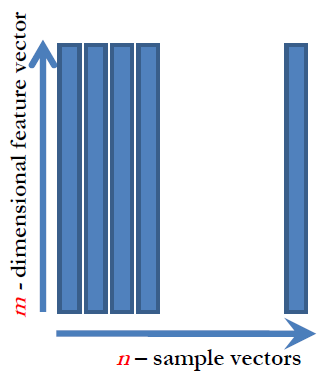

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.matlib as mb

m = 100 # samples vector
n = 10  # Each column represenets a feature point vector
Y = np.random.normal(0, 1, size=(m, n))

print(Y.shape)

(100, 10)


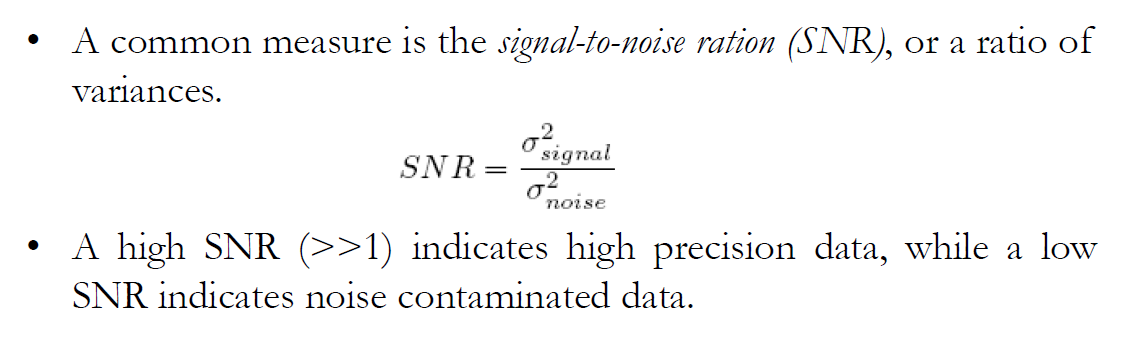

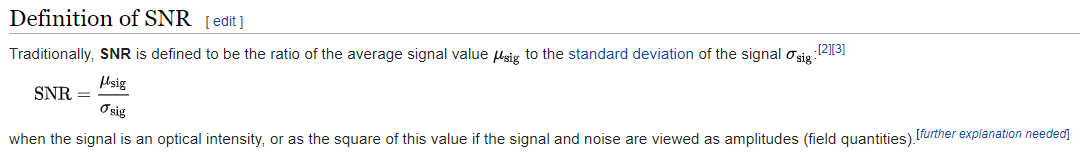

In [ ]:
def signaltonoise(a, axis=0, ddof=0): # DDOF = Delta Degrees of Freedom
  array = np.asanyarray(a)
  mean = array.mean(axis)
  std = array.std(axis=axis, ddof=ddof)
  return np.where(std == 0, 0, mean/std)

SNR = signaltonoise(Y)
print(SNR.reshape(10,1))

# SNR_dB = 10*math.log10(SNR) going to get a domain issue with this...

[[-0.1147826 ]
 [-0.01575309]
 [-0.04424361]
 [ 0.05722367]
 [-0.04787377]
 [ 0.03642913]
 [-0.03933955]
 [ 0.10545425]
 [ 0.09705433]
 [ 0.04726566]]


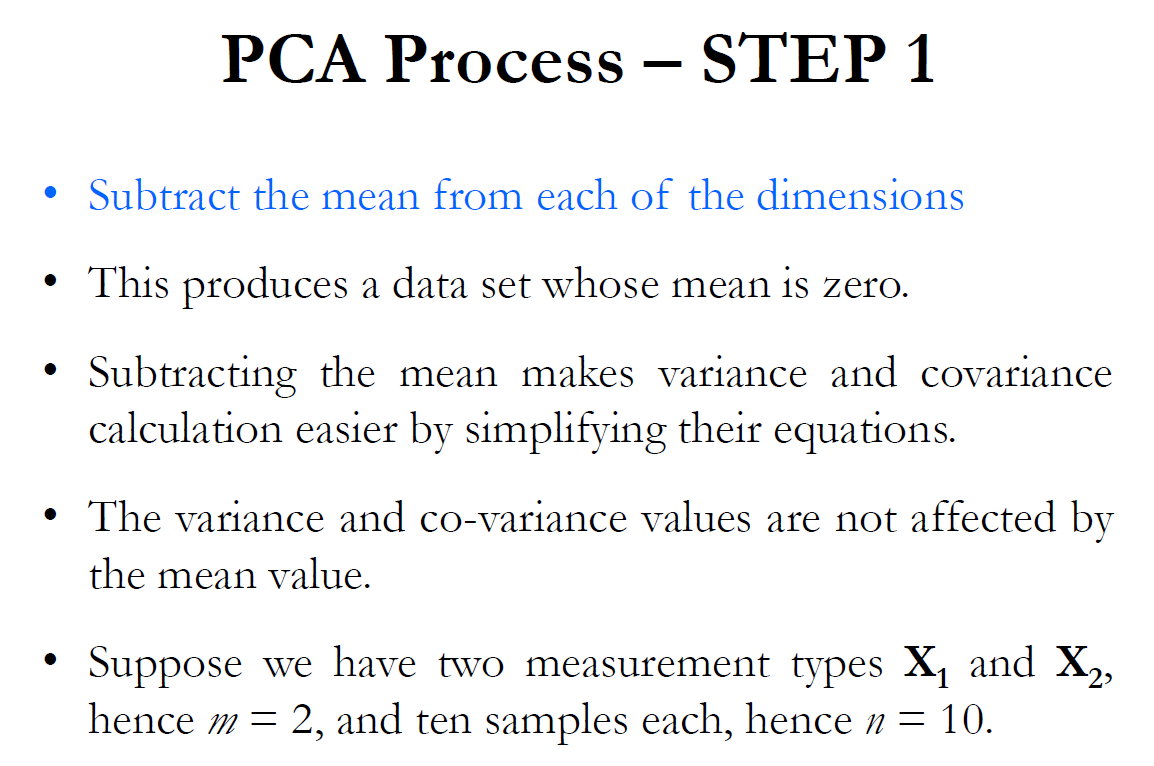

Standardization:

Compute the mean of these vectors and centralize the points around their mean

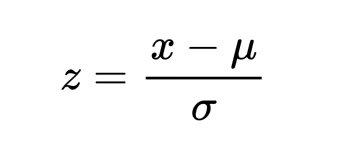

*NOTE: Need to just get a zero mean because we are analyzing the standard deviation

Standardization basically transforms (or maps) our data from some mean and standard deviation $X~N(μ,σ)$ to $X~N(0,1)$

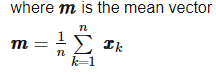

In [ ]:
# compute the d dimensional (number of column vectors) mean vector
mean_vector = np.mean(Y, axis = 0).reshape(10,1)

print('Mean Vector:\n', mean_vector)

transposed_y = Y.T

Mean Vector:
 [[-0.11409205]
 [-0.01527393]
 [-0.04337003]
 [ 0.05369969]
 [-0.04502695]
 [ 0.03648673]
 [-0.03988991]
 [ 0.10289101]
 [ 0.09115711]
 [ 0.04427686]]


In [ ]:
# Centralize about the mean
'''
Standardization:
   Z = ( X - μ) / σ
'''

Y -= Y.mean(axis=0) # subtract mean
# Y = Y/Y.std(axis=0) # divide by standard deviation

In [ ]:
# compute the d dimensional (number of column vectors) mean vector
mean_vector = np.mean(Y, axis = 0).reshape(10,1)
standard_deviation_vector = np.std(Y, axis = 0).reshape(10,1)

print('Mean Vector:\n', mean_vector)
print('\nStandard Deviation Vector:\n', standard_deviation_vector)

Mean Vector:
 [[-3.74700271e-18]
 [-4.44089210e-18]
 [-3.10862447e-17]
 [-3.55271368e-17]
 [-2.77555756e-17]
 [-5.10702591e-17]
 [ 2.77555756e-17]
 [-3.27515792e-17]
 [-4.44089210e-18]
 [ 2.27595720e-17]]

Standard Deviation Vector:
 [[0.99398392]
 [0.96958267]
 [0.98025539]
 [0.93841739]
 [0.94053483]
 [1.00158102]
 [1.01398992]
 [0.97569342]
 [0.93923787]
 [0.93676595]]


the number above is very close to zero and is due to rounding errors in the computations

The probability density for the Gaussian distribution is

$$pdf(x,μ,σ)=\frac{1}{\sqrt{2πσ^2}}e^{\frac{−(μ−x)^2}{2σ^2}}$$

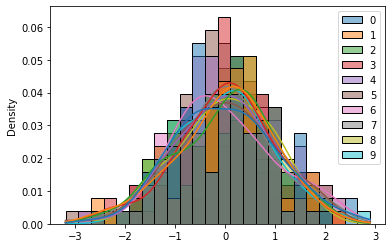

In [ ]:
# plot Density of Y
sns.histplot(Y, stat = "density", kde = True)

## Define Eigen Vectors and Eigen Values

Let S be a square matrix. A non-zero vector **v** is an [eigenvector](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) for S with [eigenvalue](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) λ if

$$Sv = λv$$

Rearranging the equation, we see that **v** is a solution of the homogeneous system of equations

$$(S - λI)v = 0$$

where **I** is the identity matrix of size *n*. Non-trivial solutions exist only if the matrix $(S - λI)$ is singular which means $det(S - λI) = 0$. Therefore eigenvalues of $S$ are roots of the [characteristic polynomial](https://en.wikipedia.org/wiki/Characteristic_polynomial)

$$p(λ) = det(S - λI) = 0$$



## 2. Compute the Eigen vectors of the matrix $S_1=YY^t$.

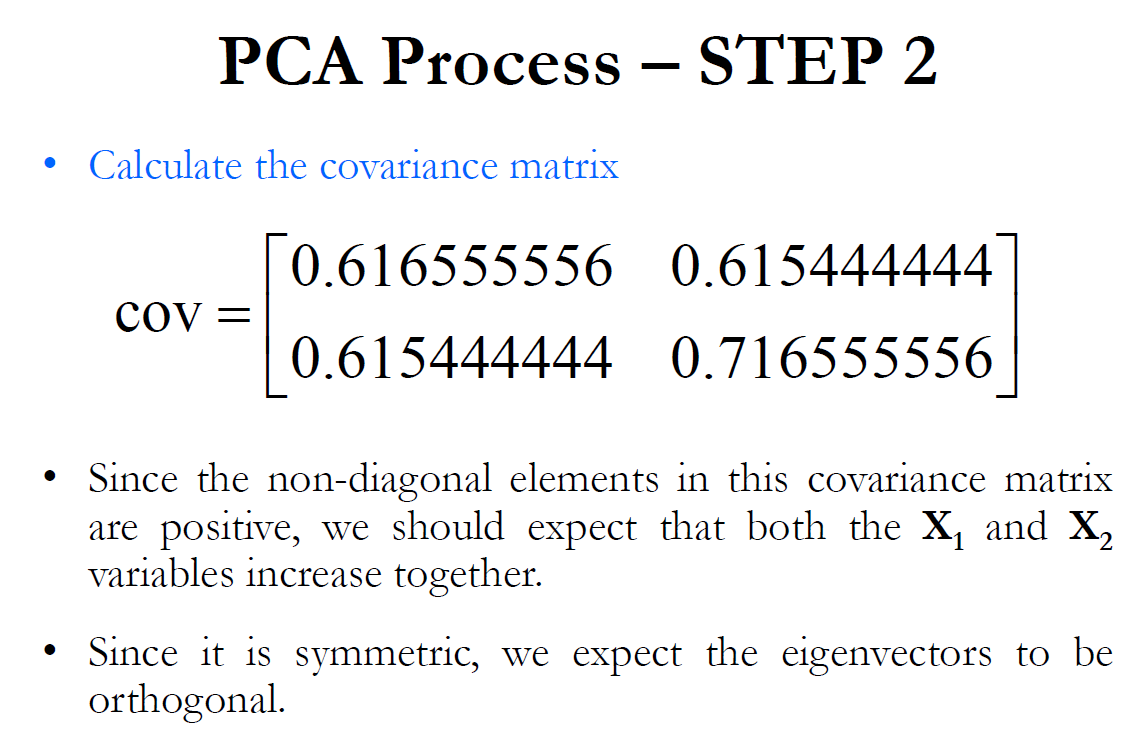

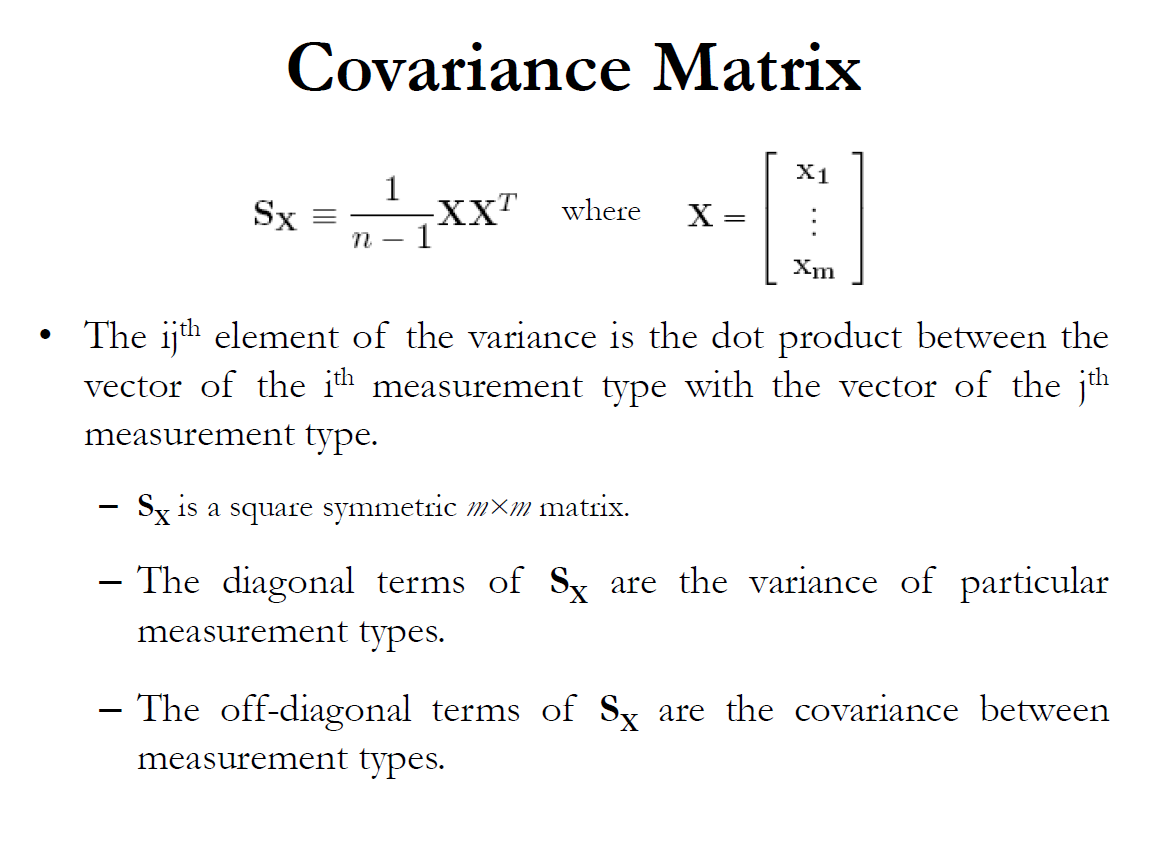

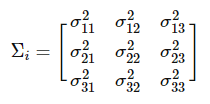

The $\frac{1}{n-1}$ term is necessary in order to obtain an unbiased covariance matrix

In [ ]:
# Compute S_1 = Y * Y.T Square Symmetric Covariance Matrix
S_1 = (Y @ Y.T)/ (n - 1) # or use np.matmul(Y, Y.T)
print(S_1)
print(S_1.shape)

[[ 1.07720694  0.26085491  0.34080695 ... -0.47645468 -0.1725539
  -0.37364027]
 [ 0.26085491  0.42190648  0.46130357 ... -0.10815436 -0.35147655
   0.01727076]
 [ 0.34080695  0.46130357  1.3670437  ...  0.18423674 -0.71994478
  -0.21543781]
 ...
 [-0.47645468 -0.10815436  0.18423674 ...  1.20863719 -0.55395677
   0.50006905]
 [-0.1725539  -0.35147655 -0.71994478 ... -0.55395677  1.29615036
  -0.11438494]
 [-0.37364027  0.01727076 -0.21543781 ...  0.50006905 -0.11438494
   1.11726384]]
(100, 100)


In [ ]:
print(np.cov(Y))
print(np.cov(Y).shape)

[[ 1.01344211  0.27785048  0.41596775 ... -0.31134045 -0.23679279
  -0.36084121]
 [ 0.27785048  0.41737657  0.44127057 ... -0.15216309 -0.33435463
   0.01385936]
 [ 0.41596775  0.44127057  1.27845026 ... -0.01038649 -0.64422519
  -0.2305243 ]
 ...
 [-0.31134045 -0.15216309 -0.01038649 ...  0.78108636 -0.387615
   0.46692685]
 [-0.23679279 -0.33435463 -0.64422519 ... -0.387615    1.23143389
  -0.10149073]
 [-0.36084121  0.01385936 -0.2305243  ...  0.46692685 -0.10149073
   1.11469478]]
(100, 100)


The covariance matrix computations are virually the same (except for a 3 decimal place and beyond rounding error).

In [ ]:
# Calculate the eigenvalues and right eigenvectors of S_1.
[D1, V1] = np.linalg.eig(S_1) # eigen values, eigen vector
# D1 = np.array(D1*np.identity(len(S_1)))
print(f"\nEigen values D1 = \n{D1}")
print(f"\nEigen vectors V1 = \n{V1}")

idx = D1.argsort()[::-1]
D1 = D1[idx]
V1 = V1[idx]

print(f"\nSorted Eigen values D1 = \n{D1}")

# all of V
print(f"\nSorted Eigen vectors V1 = \n{V1}")


Eigen values D1 = 
[ 1.54096611e+01+0.00000000e+00j  1.40889085e+01+0.00000000e+00j
  1.32103575e+01+0.00000000e+00j  1.23347361e+01+0.00000000e+00j
  4.95562076e+00+0.00000000e+00j  1.07704597e+01+0.00000000e+00j
  1.00793477e+01+0.00000000e+00j  8.76277050e+00+0.00000000e+00j
  6.82628291e+00+0.00000000e+00j  7.97567887e+00+0.00000000e+00j
 -1.40640180e-15+0.00000000e+00j  9.77063722e-16+5.19813161e-16j
  9.77063722e-16-5.19813161e-16j -9.46511924e-16+2.50222898e-16j
 -9.46511924e-16-2.50222898e-16j  6.92401003e-16+5.87317706e-16j
  6.92401003e-16-5.87317706e-16j -9.51824216e-16+0.00000000e+00j
  8.75071292e-16+1.76990071e-17j  8.75071292e-16-1.76990071e-17j
  7.57180877e-16+1.43841147e-16j  7.57180877e-16-1.43841147e-16j
 -7.25322577e-16+3.27218911e-16j -7.25322577e-16-3.27218911e-16j
  1.40016110e-16+6.70355684e-16j  1.40016110e-16-6.70355684e-16j
  7.19560101e-16+0.00000000e+00j -4.77109738e-16+4.95119658e-16j
 -4.77109738e-16-4.95119658e-16j  3.61031615e-16+5.45959493e-16j
  3.6

In [ ]:
print(V1.shape)

(100, 100)


In [ ]:
# First column is the first eigenvector
v1 = V1[:,0] # [all rows, first column]
v2 = V1[:,1] # Second column is the second eigenvector

first_eigen_vector_of_S_1 = v1
# Let's check that the eigenvectors are orthogonal to each other:

print(v1 @ v2)

(-1.1316032410945846e-15+0j)


The dot product of eigenvectors $v1$ and $v2$ is zero (the number above is very close to zero and is due to rounding errors in the computations) and so they are orthogonal.

## 3. Compute the Eigen vectors of the matrix $S_2=Y^t Y$.

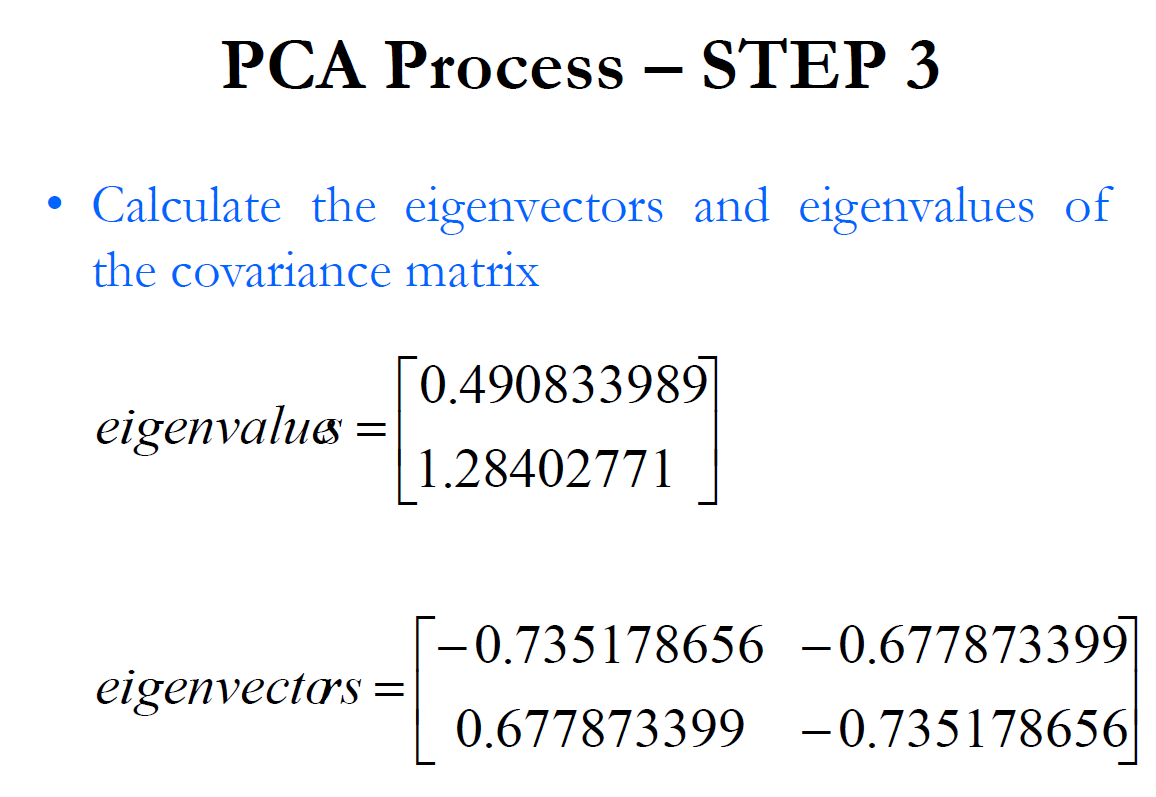

In [ ]:
# Compute S_2 = Y.T * Y Square Symmetric Covariance Matrix
S_2 = (Y.T @ Y)/ (n - 1) # or use np.matmul(Y, Y.T)
print(S_2)
print(S_2.shape)

[[10.97782253  0.92097918  0.40589288 -0.88953752  2.14262132 -1.01794256
  -0.38993614  0.62619049  0.16039283  0.14017442]
 [ 0.92097918 10.44545053  0.59878078 -1.45761207  1.99368834 -0.76074875
   1.24636035 -0.1612688   1.1888468  -0.23150762]
 [ 0.40589288  0.59878078 10.67667357 -0.71396612 -1.71995869  0.37115054
   0.16170166  0.46746179  2.09873977  0.51275959]
 [-0.88953752 -1.45761207 -0.71396612  9.78474673  1.49261142  0.1003363
   1.0352096  -1.44064704  0.30511812  0.17810069]
 [ 2.14262132  1.99368834 -1.71995869  1.49261142  9.82895291  0.87186013
   1.40936349  1.30790823 -0.48380842 -0.18460436]
 [-1.01794256 -0.76074875  0.37115054  0.1003363   0.87186013 11.14627267
   0.60396078 -1.35402494 -0.20242625 -1.8054347 ]
 [-0.38993614  1.24636035  0.16170166  1.0352096   1.40936349  0.60396078
  11.42417288  0.81182023  0.29753114  1.91216092]
 [ 0.62619049 -0.1612688   0.46746179 -1.44064704  1.30790823 -1.35402494
   0.81182023 10.57752934 -0.05083031  0.73672833]
 

In [ ]:
print(np.cov(Y.T))
print(np.cov(Y.T).shape)

[[ 0.99798387  0.08372538  0.03689935 -0.08086705  0.19478376 -0.09254023
  -0.03544874  0.05692641  0.01458117  0.01274313]
 [ 0.08372538  0.94958641  0.05443462 -0.13251019  0.18124439 -0.06915898
   0.11330549 -0.0146608   0.10807698 -0.02104615]
 [ 0.03689935  0.05443462  0.97060669 -0.06490601 -0.15635988  0.03374096
   0.01470015  0.04249653  0.19079452  0.04661451]
 [-0.08086705 -0.13251019 -0.06490601  0.88952243  0.13569195  0.00912148
   0.09410996 -0.13096791  0.02773801  0.01619097]
 [ 0.19478376  0.18124439 -0.15635988  0.13569195  0.89354117  0.07926001
   0.12812395  0.11890075 -0.04398258 -0.01678221]
 [-0.09254023 -0.06915898  0.03374096  0.00912148  0.07926001  1.01329752
   0.05490553 -0.12309318 -0.01840239 -0.16413043]
 [-0.03544874  0.11330549  0.01470015  0.09410996  0.12812395  0.05490553
   1.03856117  0.07380184  0.02704829  0.17383281]
 [ 0.05692641 -0.0146608   0.04249653 -0.13096791  0.11890075 -0.12309318
   0.07380184  0.96159358 -0.00462094  0.0669753 ]


In [ ]:
# Calculate the eigenvalues and right eigenvectors of S_1.
[D2, V2] = np.linalg.eig(S_2) # eigen values, eigen vector
#D2 = np.array(D2*np.identity(len(S_2)))

print(f"\nEigen values D2 = \n{D2}")
print(f"\nEigen vectors V2 = \n{V2}")

idx = D2.argsort()[::-1]
D2 = D2[idx]
V2 = V2[idx]

print(f"\nSorted Eigen values D2 = \n{D2}")

# all of V
print(f"\nSorted Eigen vectors V2 = \n{V2}")


Eigen values D2 = 
[ 4.95562076 15.40966112  6.82628291 14.08890847 13.21035746 12.3347361
 10.77045972 10.07934766  8.7627705   7.97567887]

Eigen vectors V2 = 
[[-0.2291088   0.38960366  0.22666557 -0.07179574  0.4490296  -0.18186334
   0.2694744   0.49106786  0.43644524 -0.01535701]
 [-0.41133043  0.4255002  -0.20081014 -0.05015473  0.05685002 -0.42245136
   0.1491604  -0.61426099 -0.13805614 -0.08120766]
 [ 0.1864486   0.13653821 -0.33379054  0.52460642 -0.22267024 -0.37514571
  -0.10029995  0.31735703 -0.00463749 -0.50877579]
 [-0.43023112 -0.10398566 -0.07087012 -0.31100325 -0.35454322  0.20280377
   0.44395591  0.3227585  -0.34723079 -0.33715454]
 [ 0.57979148  0.34116727 -0.32307567 -0.55675063  0.09536719 -0.11750862
   0.05671142  0.15514363 -0.27801287  0.0749501 ]
 [-0.28592063 -0.294393   -0.1324718  -0.29472768 -0.26293771 -0.56554542
  -0.35582779  0.26112681  0.10655823  0.36336736]
 [ 0.10164949  0.39150584  0.40592856 -0.27233478 -0.57853982  0.07488206
  -0.24675082

In [ ]:
# First column is the first eigenvector
v1 = V2[:,0] # [all rows, first column]
v2 = V2[:,1] # Second column is the second eigenvector

first_eigen_vector_of_S_2 = v1
# Let's check that the eigenvectors are orthogonal to each other:

print(v1 @ v2)

4.2327252813834093e-16


The dot product of eigenvectors $v1$ and $v2$ is zero (the number above is very close to zero and is due to rounding errors in the computations) and so they are orthogonal.

## 4. Multiply the first Eigen vector of $S_2$ by the matrix Y. Normalize the result by dividing by the vector norm. Compare the resulting vector with the first eigen vector of $S_1$.

In [ ]:
from numpy import linalg as LA
# matrix dimensions are: (100, 10) x (10, 1) = (100, 1)
x = (Y @ first_eigen_vector_of_S_2) / (LA.norm(Y @ first_eigen_vector_of_S_2))

y = first_eigen_vector_of_S_1

print(x - y)

[ 0.05381113+0.j  0.04836981+0.j -0.06738967+0.j -0.16226484+0.j
 -0.0243931 +0.j -0.15113641+0.j  0.04280507+0.j  0.04784606+0.j
 -0.10533834+0.j  0.20066603+0.j  0.11639832+0.j -0.13931612+0.j
  0.11764145+0.j -0.38698316+0.j  0.19432173+0.j -0.20034459+0.j
  0.02152436+0.j -0.0224061 +0.j  0.01284163+0.j -0.01727852+0.j
 -0.15515505+0.j -0.22845946+0.j  0.02877511+0.j  0.02333973+0.j
  0.16510888+0.j  0.16862777+0.j -0.2367485 +0.j -0.03383602+0.j
  0.1442697 +0.j  0.15379522+0.j -0.00580961+0.j -0.10013015+0.j
 -0.05729729+0.j -0.29263696+0.j -0.04855137+0.j  0.22974487+0.j
 -0.02268167+0.j  0.02862895+0.j  0.09802971+0.j  0.06254869+0.j
 -0.22968314+0.j  0.00600112+0.j -0.00909128+0.j  0.18365149+0.j
 -0.22414481+0.j -0.00912804+0.j  0.25335749+0.j -0.18782129+0.j
  0.11643463+0.j -0.08807527+0.j -0.16247299+0.j -0.00818966+0.j
  0.09624944+0.j -0.03425287+0.j -0.03374305+0.j -0.02361012+0.j
 -0.20348135+0.j -0.03341558+0.j  0.0799021 +0.j  0.05839807+0.j
  0.03825113+0.j  0.08720

The two vectors are basically the same since their difference is approximately zero.

## 5. Compare and plot the Eigen values of $S_1$ and $S_2$. Comment on the results.

**Note: These eigen values and eigen vectors need to be sorted based on eigen values in order for everything to work properly.

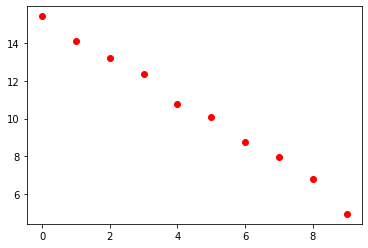

In [ ]:
import matplotlib.pyplot as plt

# plot Eigen values of S_1
plt.scatter(np.arange(10), D1[0:10].real, c = "Red")

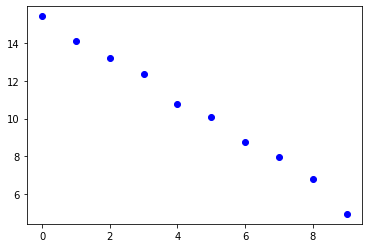

In [ ]:
# plot Eigen values of S_2
plt.scatter(np.arange(10), D2.real, c = "Blue")

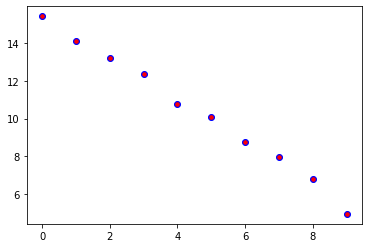

In [ ]:
# plot Eigen values of S_1 and S_2
plt.scatter(np.arange(10), D2.real, c = "Blue")
plt.scatter(np.arange(10), D1[0:10].real, s = 12, c = "Red")

The two plots show that the first 10 eigen values of the covariance matrices $S_1 = \frac{1}{n-1} YY^t$ and $S_2 = \frac{1}{n-1} Y^tY$ are very close if not the same.

# Part 2: 
In this part, we aim to use PCA to reduce the dimensionality of a set of feature points. Given a list of 11 binary images (256 X 256) of a fighter jet:

- 1. Read every image to construct a feature vector that represents the intensity values of the image pixels in order. Your feature vector size will be 256^2  ×1. A total of 11 feature vectors will represent the variations of the jet shape as the matrix Y (size 256^2  ×11).
- 2. Use the procedure described in Part 1 to compute the Eigen vectors of the matrix S=YY^t. (all vectors are centralized around their mean). Note that the matrix size of S is 256^2  × 256^2. This size is really a big computational challenge. Comment on this in your report.
- 3. Use the first three Eigen vectors of S to compute a new vector representation of each fighter jet image.
- 4. Plot the new point vectors in 3D space. Comment on the results describing the images that are very different from the others.
- 5. Use the approach described in the lectures, to select an optimal feature size based on the Eigen values and the variance of the projected features. You can plot the variance versus the feature index to pick the point at which variance becomes insignificant.



## 1. Read every image to construct a feature vector that represents the intensity values of the image pixels in order. Your feature vector size will be $256^2  × 1$. A total of 11 feature vectors will represent the variations of the jet shape as the matrix Y (size $256^2  × 11$).

In [ ]:
# mount google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


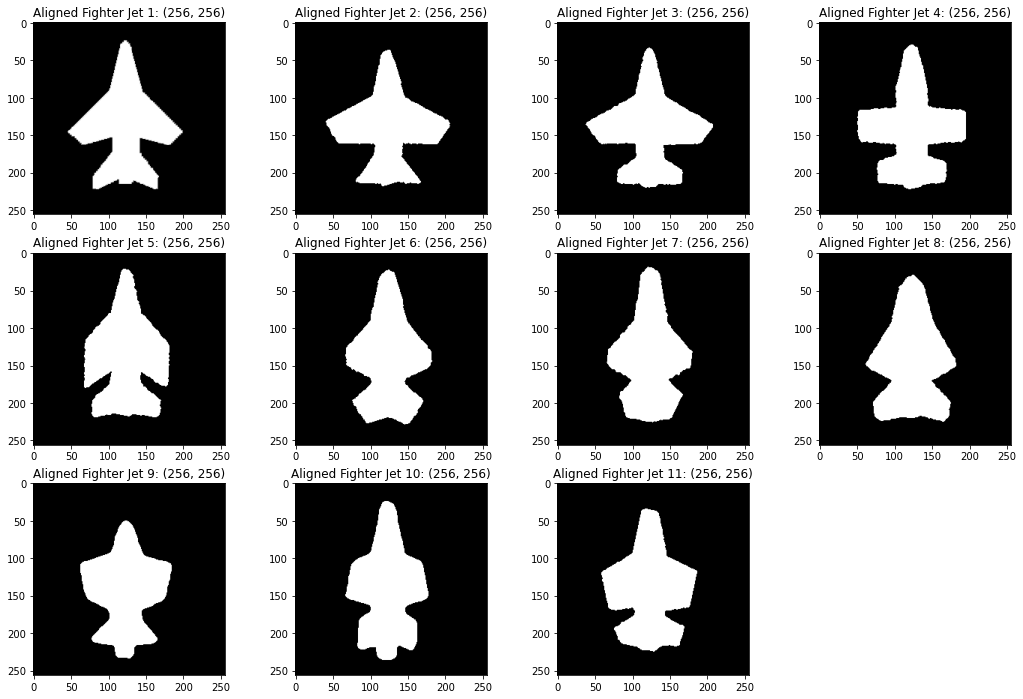


The Feature Vector has a shape of: (65536, 11)


In [ ]:
# Load the Binary Jet Image data set

# import cv2 module for reading and displaying images from colab drive
from google.colab.patches import cv2, cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# create a list data structure of the import Fighter Jet Image Data Set
Aligned_Fighter_Jets = []

# create a list data structure for the construction of reshaped feature vectors
Y = []

# Image Data Set importing
width = 18
height = 12
fig = plt.figure(figsize=(width, height))
fig.set
columns = 4
rows = 3

# indexing in python uses (0, 1,... N - 1) so if N = 12 and we want to start at 1 we use 1 to N-1 = 11
# slightly different from standard indexing in C, C++ where we start at (1)
for i in range(1, 12):
  Jets_temporary = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/PCA and LDA/Provided Material/Aligned_Fighter_{i}.bmp')
  # cv2 module automatically detects a red, blue and green image channel so we
  # need to convert the image to a single grayscale channel:
  Jets_temporary = cv2.cvtColor(Jets_temporary, cv2.COLOR_BGR2GRAY)

  # plot the Each Temporary Image with index and Image Shape
  fig.add_subplot(rows, columns, i)
  plt.title(f"Aligned Fighter Jet {i}: {Jets_temporary.shape}")
  plt.imshow(Jets_temporary, cmap='gray', vmin = 0, vmax = 255)
  
  # stored the Temporary Jet Image into the List Data Structure
  Aligned_Fighter_Jets.append(Jets_temporary)

  # reshape the image data
  L, W = Jets_temporary.shape # unpack the length and width for column vectorization
  Reshaped_Jets = Jets_temporary.reshape(L*W, 1)
  Y.append(Reshaped_Jets)
plt.show()

Y = np.array(Y) # convert the reshaped feature vector list data structure into a numpy array
Y = np.squeeze(Y) # get rid of the extra 1 dimension
Y = Y.T # transpose the Data into ( 256^2, 11) feature vector
# 256**2 = 65,536 (** is the exponential in python same as VHDL)
print(f"\nThe Feature Vector has a shape of: {Y.shape}")

It should be mentioned that the image dimensions of 256 x 256 pixels and the number of pixel intensity levels i.e., 0 to 255 = 256 levels are two different image attributes.

## 2. Use the procedure described in Part 1 to compute the Eigen vectors of the matrix $S = YY^t$. (all vectors are centralized around their mean). Note that the matrix size of $S$ is $256^2  × 256^2$. This size is really a big computational challenge. Comment on this in your report.

A.K.A., "Curse of Dimensionality"

Tried many different ways to handle this large matrix multiplication and the best way was to use hdf5 heirerchical data formats to fill a large table of values and multiply the loaded rows with the loaded columns. close those parts and load the next row and next column, multiply and so on.

We can use the method for inverse matrix approximation using $S = Y^tY$ where the eigen vector times Y normalized will be the same as the eigen vector of $S = YY^t$.

In [ ]:
original_mean_vector = np.mean(Y, axis = 0).reshape(11,1)
original_standard_deviation_vector = np.std(Y, axis = 0).reshape(11,1)
original_data = Y

print('Mean Vector:\n', original_mean_vector)
print('\nStandard Deviation Vector:\n', original_standard_deviation_vector)

Mean Vector:
 [[49.01756287]
 [49.43504333]
 [50.97587585]
 [52.3299408 ]
 [53.83964539]
 [51.53617859]
 [50.27549744]
 [54.32601929]
 [47.64518738]
 [51.01867676]
 [52.96028137]]

Standard Deviation Vector:
 [[ 99.87507691]
 [100.80730401]
 [101.98190243]
 [102.98403857]
 [104.06921811]
 [102.39994061]
 [101.45258106]
 [104.41177398]
 [ 99.39546721]
 [102.0140049 ]
 [103.4411927 ]]


In [ ]:
# Centralize about the mean
'''
Standardization:
   Z = ( X - μ) / σ
'''
Y = Y.astype('float64') # there was a unit8 data type error that this resolves

Y -= Y.mean(axis=0) # subtract mean
# Y = Y/Y.std(axis=0) # divide by standard deviation

In [ ]:
mean_vector = np.mean(Y, axis = 0).reshape(11,1)
standard_deviation_vector = np.std(Y, axis = 0).reshape(11,1)

print('Mean Vector:\n', mean_vector)
print('\nStandard Deviation Vector:\n', standard_deviation_vector)

Mean Vector:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Standard Deviation Vector:
 [[ 99.87507691]
 [100.80730401]
 [101.98190243]
 [102.98403857]
 [104.06921811]
 [102.39994061]
 [101.45258106]
 [104.41177398]
 [ 99.39546721]
 [102.0140049 ]
 [103.4411927 ]]


In [ ]:
# Compute S = Y * Y.T Square Symmetric Covariance Matrix

# Need to find a way to compute these matrices so that we don't use 
# 32 Giga-Bytes of Memory for a float64 data type

m, n = Y.shape # dimensional feature vector, sample vectors

S = (Y.T @ Y) / (n - 1)

In [ ]:
# Calculate the eigenvalues and right eigenvectors of S.
[D, V] = np.linalg.eig(S) # eigen values, eigen vector
#D = np.array(D*np.identity(len(S_2)))
V = np.array(V.real)

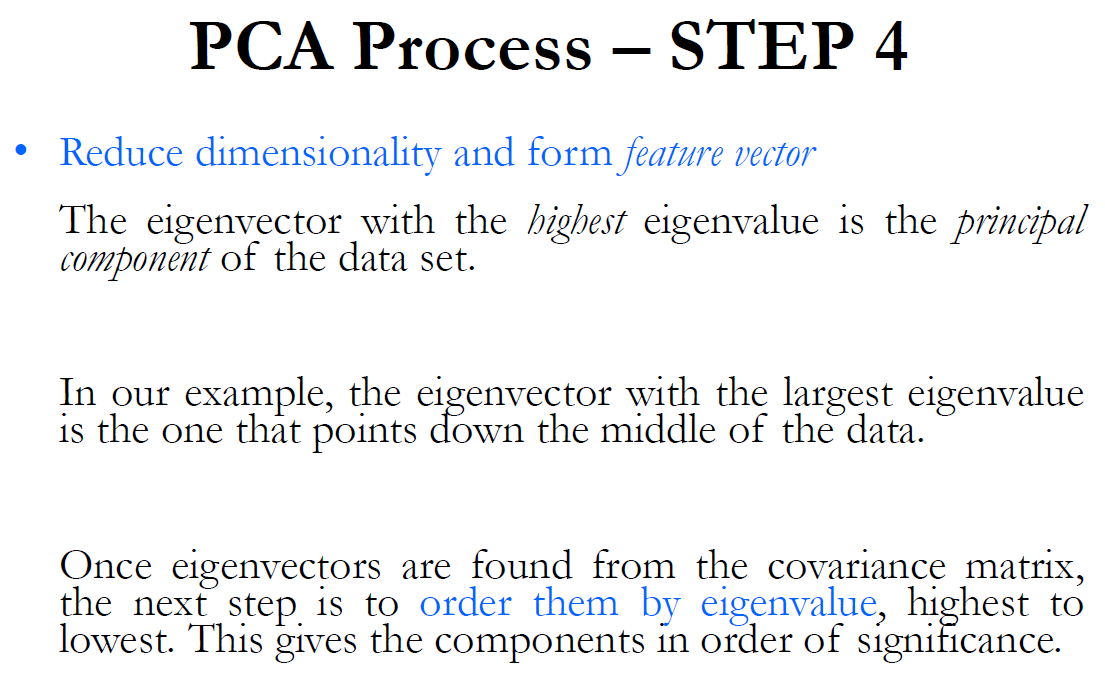

In [ ]:
print(V)
print(V.shape)

[[ 0.2975806  -0.20626444 -0.15380779 -0.05851326  0.55696786  0.08318174
   0.18523075  0.43192079 -0.54060087 -0.10132304 -0.0361396 ]
 [ 0.29064631 -0.5079205   0.04266849  0.13705666  0.1621289  -0.68758955
  -0.12050955 -0.27118774  0.14927661 -0.13617236  0.09475993]
 [ 0.29723794 -0.48131324 -0.01865528  0.10953103  0.07306497  0.67333117
  -0.16272978 -0.27976382  0.18933792  0.22384521  0.13499797]
 [ 0.30223277 -0.2745906  -0.34810651  0.02709914 -0.61212123 -0.03539244
   0.3005874   0.38874556  0.16296539 -0.00472455 -0.25950316]
 [ 0.30818754  0.14759174  0.03297472 -0.76377023  0.2102062   0.03142139
   0.11750943 -0.12637727  0.38936821 -0.14324173 -0.22743219]
 [ 0.30832547  0.2904732  -0.13560837  0.14001264  0.07003231 -0.16974835
   0.14207263 -0.32258782 -0.18667967  0.68749034 -0.34221154]
 [ 0.30101847  0.3141232  -0.08832104  0.41831013 -0.00442964  0.17325885
   0.20529359 -0.36387926 -0.04405285 -0.63004749 -0.15632723]
 [ 0.3056958   0.31486875 -0.40439093  0.

In [ ]:
# first 11 eigen values of S = Y * Y.T will be the same as the eigen values of 
# S = Y.T * Y
print(D)
print(D.shape)

[6.45269237e+08 3.61788877e+07 1.55372492e+07 1.21129684e+07
 9.91281765e+06 2.90717822e+06 7.96245923e+06 6.86769042e+06
 5.41515771e+06 4.31537980e+06 4.82669661e+06]
(11,)


In [ ]:
# First column is the first eigenvector

# Eigen vectors of S = YY^t
v1 = V[:,0] # [all rows, first column]
v2 = V[:,1] # Second column is the second eigen vector
v3 = V[:,2] # 3rd column eigen vector
v4 = V[:,3]
v5 = V[:,4]
v6 = V[:,5]
v7 = V[:,6]
v8 = V[:,7]
v9 = V[:,8]
v10 = V[:,9]
v11 = V[:,10]

# Let's check that the eigenvectors are orthogonal to each other:

print(v1 @ v2)

9.020562075079397e-17


In [ ]:
Sorted_D = np.sort(D)[::-1]
print(Sorted_D)
# First 3 eigen values already sorted i.e., don't need to sort eigen vectors

[6.45269237e+08 3.61788877e+07 1.55372492e+07 1.21129684e+07
 9.91281765e+06 7.96245923e+06 6.86769042e+06 5.41515771e+06
 4.82669661e+06 4.31537980e+06 2.90717822e+06]


- The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for Y.

- A total of m or less components must be selected to comprise the chosen subspace. Ideally, we would select k eigenvectors, called principal components, that have the k largest eigenvalues.


**From the eigen values we see the first three are the largest with v1 being the Principal Component of our Fighter Jet data Y. So we can use these three as the chosen basis for the projected subspace of our data.**

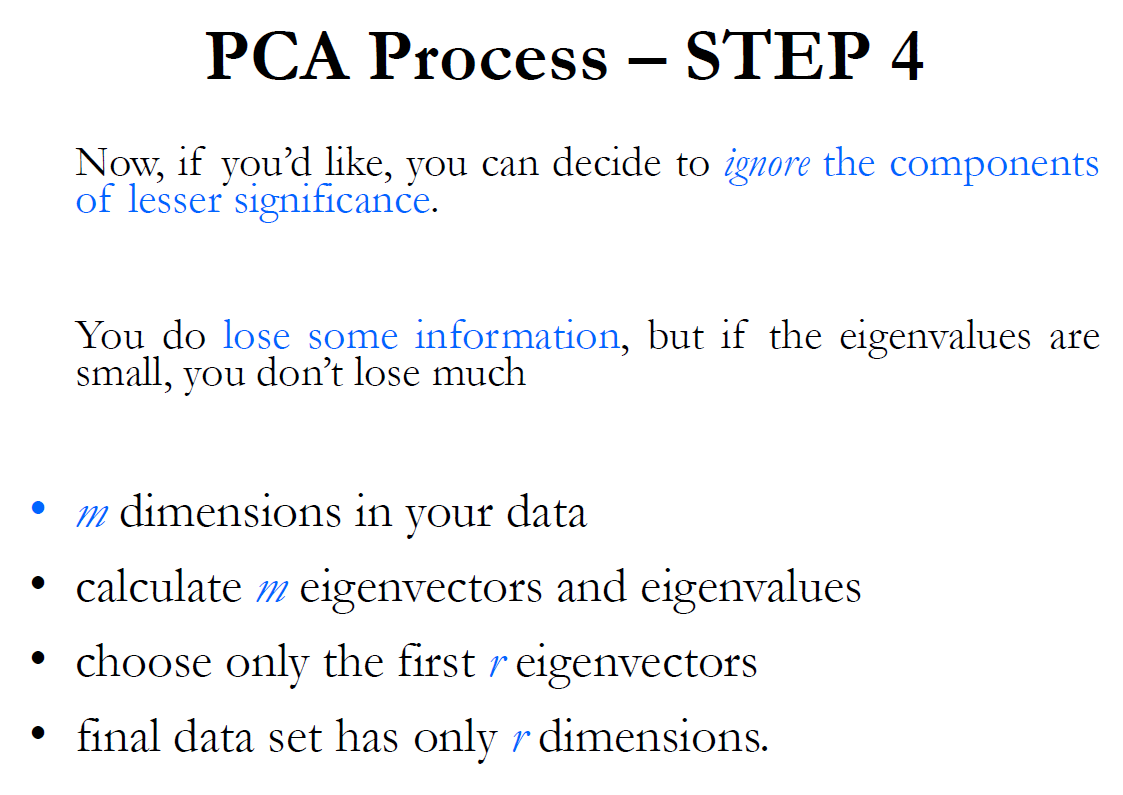

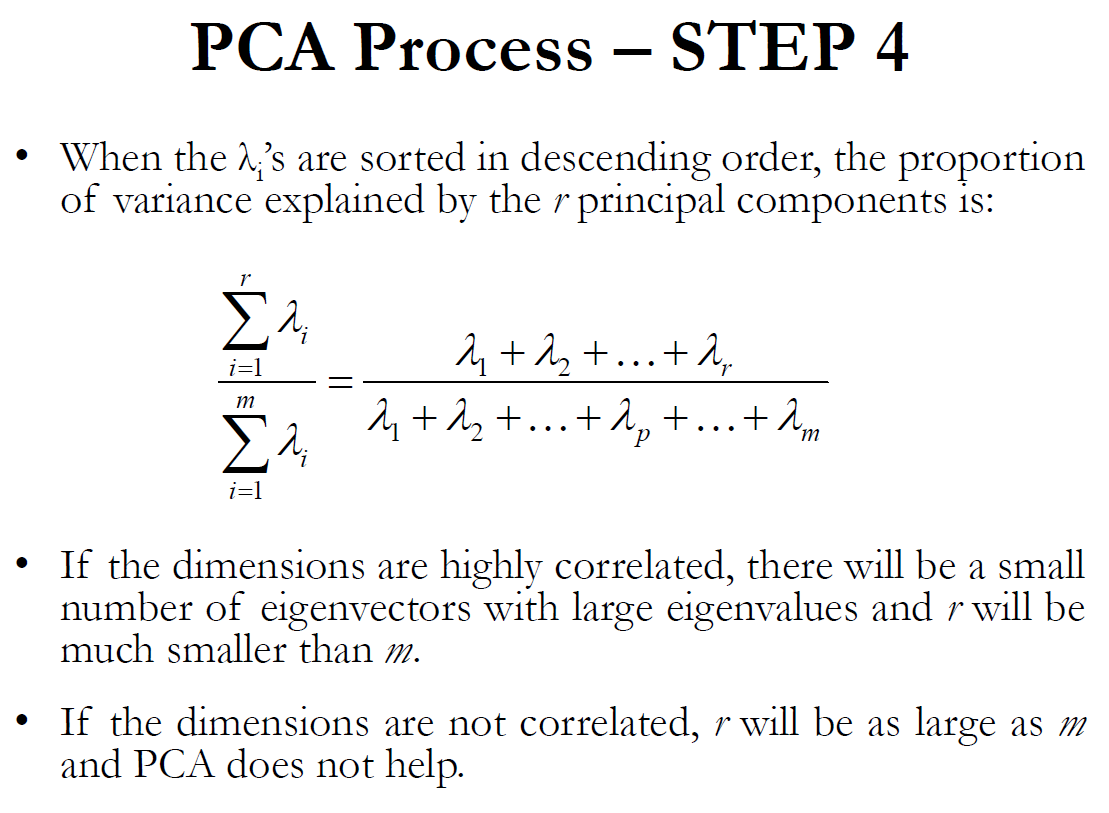

In [ ]:
d1 = Sorted_D[0]
d2 = Sorted_D[1]
d3 = Sorted_D[2]
print(d1)
print(d2)
print(d3)

645269237.07318
36178887.745288655
15537249.181831457


In [ ]:
proportion_of_variance_explained_by_the_r_PC = (d1 + d2 + d3) / sum(Sorted_D)
print(proportion_of_variance_explained_by_the_r_PC) # i.e., 92.8% of data

0.9276987430821804


In [ ]:
feature_eigen_values = np.array([[d1], [d2], [d3]])
print(feature_eigen_values )

[[6.45269237e+08]
 [3.61788877e+07]
 [1.55372492e+07]]


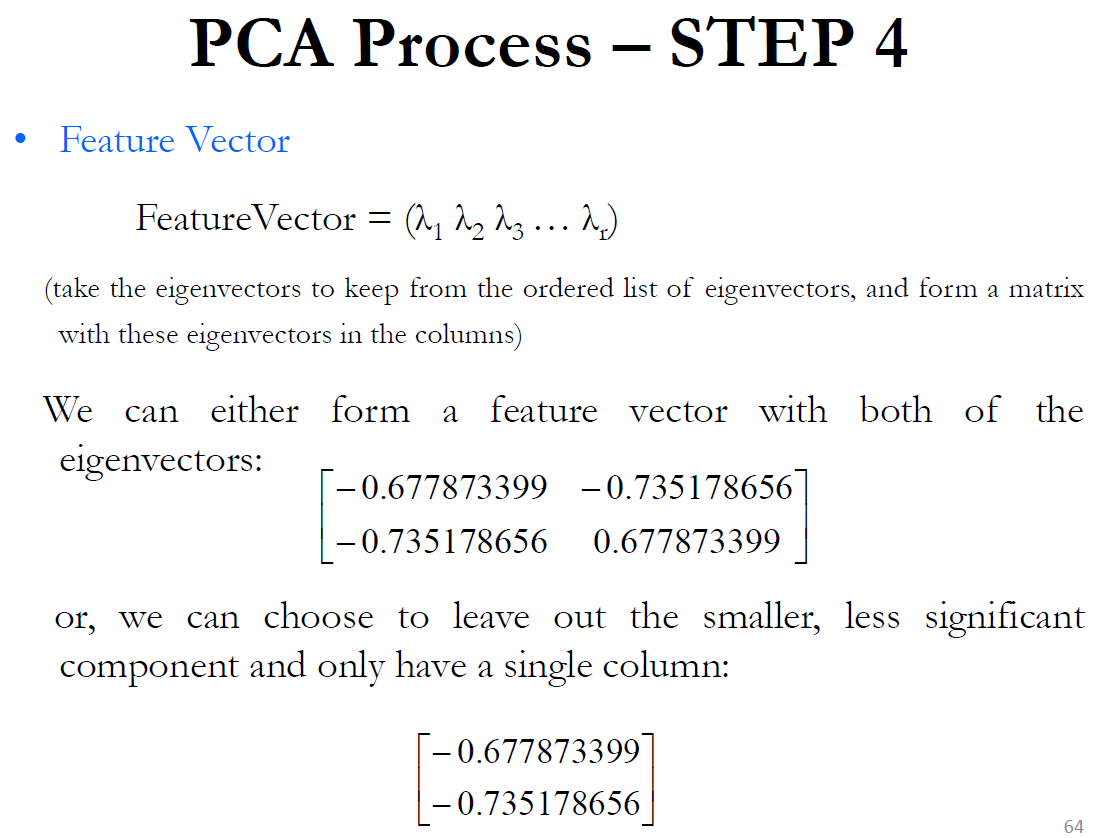

## 3. Use the first three Eigen vectors of S to compute a new vector representation of each fighter jet image.

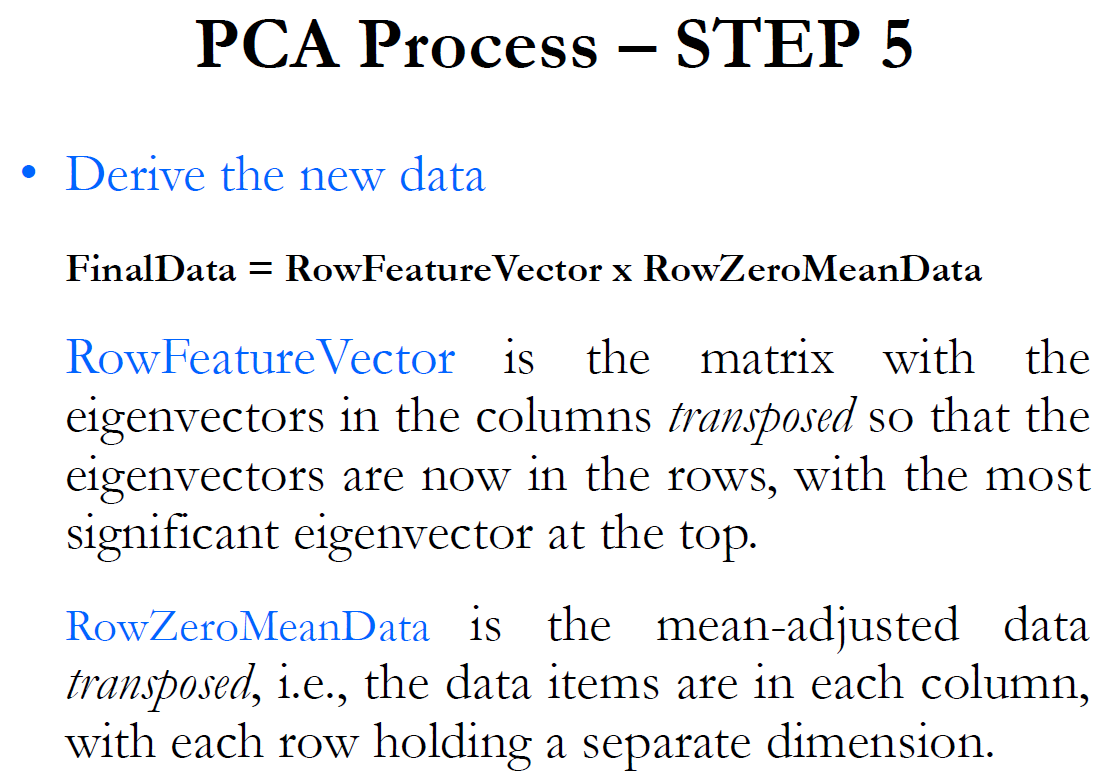

In [ ]:
print(Y.shape)

(65536, 11)


In [ ]:
# verify a mean of zero
mean_vector = np.mean(Y, axis = 0).reshape(11,1)
standard_deviation_vector = np.std(Y, axis = 0).reshape(11,1)

print('Mean Vector:\n', mean_vector)
print('\nStandard Deviation Vector:\n', standard_deviation_vector)

RowZeroMeanData = Y
print(RowZeroMeanData.shape)

Mean Vector:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Standard Deviation Vector:
 [[ 99.87507691]
 [100.80730401]
 [101.98190243]
 [102.98403857]
 [104.06921811]
 [102.39994061]
 [101.45258106]
 [104.41177398]
 [ 99.39546721]
 [102.0140049 ]
 [103.4411927 ]]
(65536, 11)


In [ ]:
from numpy import linalg as LA
# matrix dimensions are: (100, 10) x (10, 1) = (100, 1)

# Eigen vectors of S_1 = YY^t are equivalent to the Normalized ( Y times eigen vector of S_2 = Y^t * Y )
x1 = (Y @ v1) / (LA.norm(Y @ v1))
x2 = (Y @ v2) / (LA.norm(Y @ v2))
x3 = (Y @ v3) / (LA.norm(Y @ v3))
x4 = (Y @ v4) / (LA.norm(Y @ v4))
x5 = (Y @ v5) / (LA.norm(Y @ v5))
x6 = (Y @ v6) / (LA.norm(Y @ v6))
x7 = (Y @ v7) / (LA.norm(Y @ v7))
x8 = (Y @ v8) / (LA.norm(Y @ v8))
x9 = (Y @ v9) / (LA.norm(Y @ v9))
x10 = (Y @ v10) / (LA.norm(Y @ v10))
x11 = (Y @ v11) / (LA.norm(Y @ v11))

print(x1.shape) #i.e., col vectors

# append the Featurevector with the other two eigen vectors column by column
FeatureVector = x1.reshape(65536, 1)
FeatureVector = np.append(FeatureVector, x2.reshape(65536, 1), 1)
FeatureVector = np.append(FeatureVector, x3.reshape(65536, 1), 1)

# uncomment for the number of Principal Components we want from our diagonalization
# FeatureVector = np.append(FeatureVector, x4.reshape(65536, 1), 1)
# FeatureVector = np.append(FeatureVector, x5.reshape(65536, 1), 1)
# FeatureVector = np.append(FeatureVector, x6.reshape(65536, 1), 1)
# FeatureVector = np.append(FeatureVector, x7.reshape(65536, 1), 1)
# FeatureVector = np.append(FeatureVector, x8.reshape(65536, 1), 1)
# FeatureVector = np.append(FeatureVector, x9.reshape(65536, 1), 1)
# FeatureVector = np.append(FeatureVector, x10.reshape(65536, 1), 1)
# FeatureVector = np.append(FeatureVector, x11.reshape(65536, 1), 1)

# (65536, 3) matrix feature vector
print(FeatureVector.shape)

RowFeatureVector = FeatureVector.T
print(RowFeatureVector.shape)

(65536,)
(65536, 3)
(3, 65536)


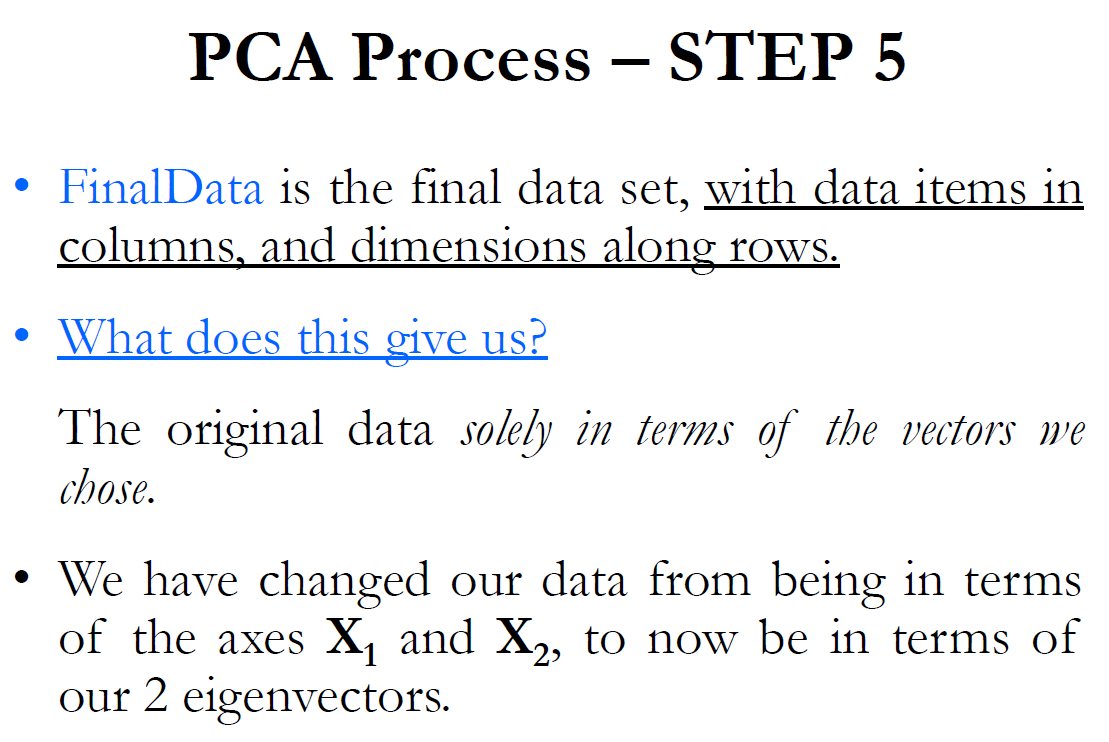

In [ ]:
FinalData = RowFeatureVector @ RowZeroMeanData
print(FinalData.shape)
X1, X2, X3 = FinalData[0], FinalData[1], FinalData[2]


(3, 11)


## 4.	Plot the new point vectors in 3D space. Comment on the results describing the images that are very different from the others.

For our case we have 3 dimensions of 11 features

**Note: Plotly is an interactive Ploting Module

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

number_of_fighters = 11 # change to see different points
# between fighter jet 8 and 9 we see the outlier is fighter jet 9
fig = px.scatter_3d(
    x=X1,
    y=X2,
    z=X3
)

# figure layout
fig.update_layout(title='Final Data: PCA of Zero Center Pixel Intensity for 11 Fighter Jets', autosize=True,
                  scene = dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='X3'),
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90)
)

# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2.5, y=-.6, z=0.2) # camera eye vector from origin rotation in radians +/- from center
)

fig.update_layout(scene_camera=camera)
fig.show()
# can zoom in with mouse wheel

**Note: When plotting a various number of fighter jets (i.e., 4,5,6,7,8,9,etc...) we see that the outlying point at the top of the graph is at the 9th Aligned Fighter Jet Feature. That is to say the 9th image in the aligned fighter jet image set is the outlier and the rest fit into two Classes. We can seperate the two classes via Classical Bayes Classification. 

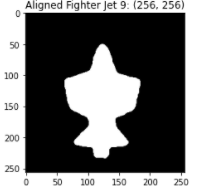

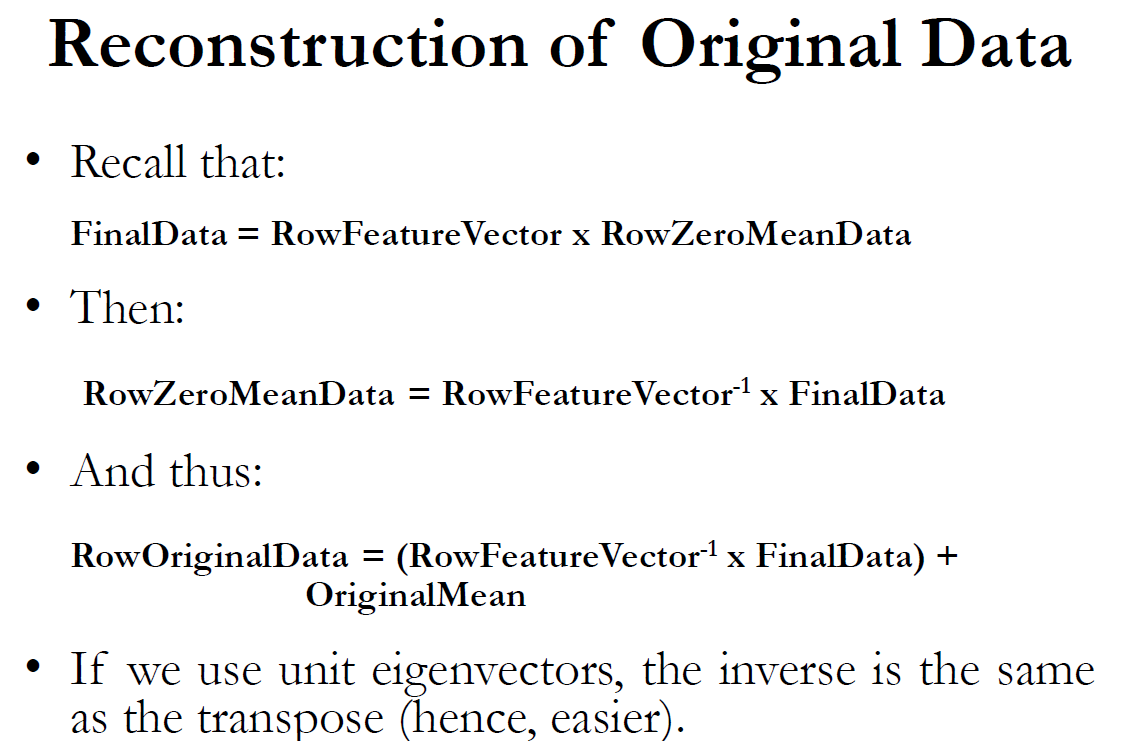

In [ ]:
print(RowFeatureVector.T.shape)
print(FinalData.shape)

(65536, 3)
(3, 11)


In [ ]:
original_mean_vector = np.mean(original_data, axis = 0).reshape(11,1)
original_standard_deviation_vector = np.std(original_data, axis = 0).reshape(11,1)

print('Original Mean Vector:\n', original_mean_vector)
print('\nOriginal Standard Deviation Vector:\n', original_standard_deviation_vector)

Original Mean Vector:
 [[49.01756287]
 [49.43504333]
 [50.97587585]
 [52.3299408 ]
 [53.83964539]
 [51.53617859]
 [50.27549744]
 [54.32601929]
 [47.64518738]
 [51.01867676]
 [52.96028137]]

Original Standard Deviation Vector:
 [[ 99.87507691]
 [100.80730401]
 [101.98190243]
 [102.98403857]
 [104.06921811]
 [102.39994061]
 [101.45258106]
 [104.41177398]
 [ 99.39546721]
 [102.0140049 ]
 [103.4411927 ]]


In [ ]:
newRowZeroMeanData = (RowFeatureVector.T @ FinalData).T
print(newRowZeroMeanData.shape)


(11, 65536)


In [ ]:
mean_vector = np.mean(newRowZeroMeanData.T, axis = 0).reshape(11,1)
standard_deviation_vector = np.std(newRowZeroMeanData.T, axis = 0).reshape(11,1)

print('Original Mean Vector:\n', mean_vector)
print('\nOriginal Standard Deviation Vector:\n', standard_deviation_vector)

Original Mean Vector:
 [[-1.07796888e-11]
 [-8.47102098e-12]
 [ 1.31085900e-11]
 [-7.51119457e-12]
 [ 5.51118201e-12]
 [-3.91220194e-12]
 [-7.18094529e-12]
 [-8.25723669e-12]
 [-7.05710598e-12]
 [ 8.58449314e-12]
 [-4.55249011e-12]]

Original Standard Deviation Vector:
 [[ 94.92115475]
 [ 98.72163429]
 [ 99.89350356]
 [ 98.475125  ]
 [ 97.33727571]
 [ 99.34521164]
 [ 97.39050282]
 [100.67828496]
 [ 97.80796887]
 [ 98.31146784]
 [ 98.60472664]]


In [ ]:
# Dentralize about the mean
'''
Standardization:
   Z = ( X - μ) / σ

Destandardization:
   X = (σ * Z) + μ
'''
RowOriginalData = (newRowZeroMeanData) + original_mean_vector

In [ ]:
mean_vector = np.mean(RowOriginalData.T, axis = 0).reshape(11,1)
standard_deviation_vector = np.std(RowOriginalData.T, axis = 0).reshape(11,1)

print('Reconstructed Original Mean Vector:\n', mean_vector)
print('\nReconstructed Original Standard Deviation Vector:\n', standard_deviation_vector)

Reconstructed Original Mean Vector:
 [[49.01756287]
 [49.43504333]
 [50.97587585]
 [52.3299408 ]
 [53.83964539]
 [51.53617859]
 [50.27549744]
 [54.32601929]
 [47.64518738]
 [51.01867676]
 [52.96028137]]

Reconstructed Original Standard Deviation Vector:
 [[ 94.92115475]
 [ 98.72163429]
 [ 99.89350356]
 [ 98.475125  ]
 [ 97.33727571]
 [ 99.34521164]
 [ 97.39050282]
 [100.67828496]
 [ 97.80796887]
 [ 98.31146784]
 [ 98.60472664]]


In [ ]:
print(RowOriginalData.T.shape)

(65536, 11)


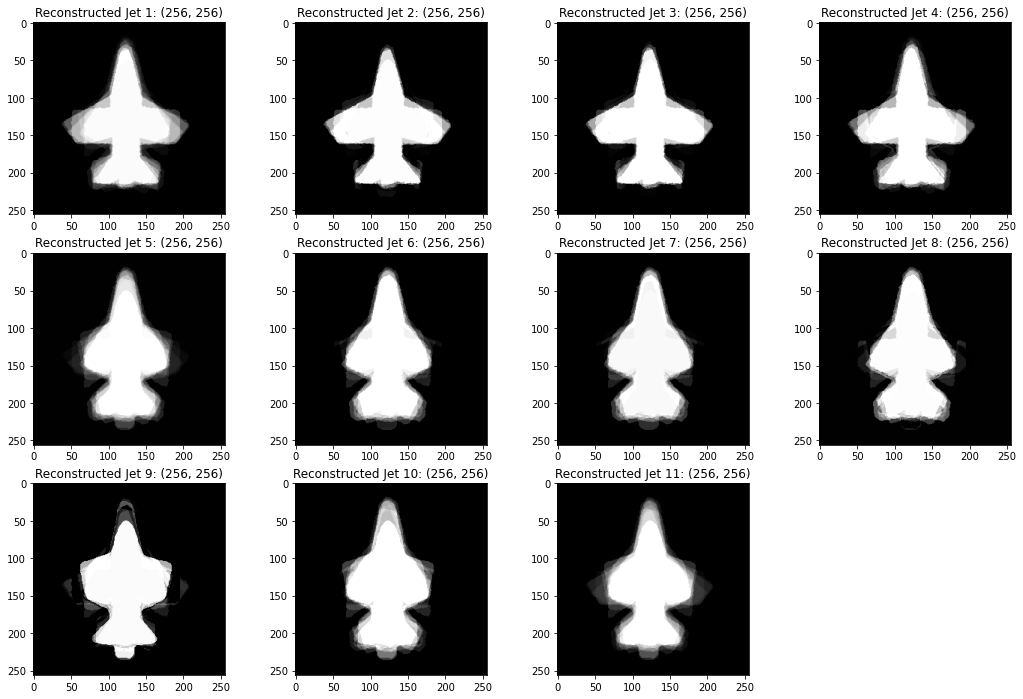


The Feature Vector has a shape of: (11, 65536)


In [ ]:
# import cv2 module for reading and displaying images from colab drive
from google.colab.patches import cv2, cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Image Data Set importing
width = 18
height = 12
fig = plt.figure(figsize=(width, height))
fig.set
columns = 4
rows = 3

# indexing in python uses (0, 1,... N - 1) so if N = 12 and we want to start at 1 we use 1 to N-1 = 11
# slightly different from standard indexing in C, C++ where we start at (1)
for i in range(1, 12):
  Jets_temporary = RowOriginalData.T[:,i-1].reshape(256,256)
  

  # plot the Each Temporary Image with index and Image Shape
  fig.add_subplot(rows, columns, i)
  plt.title(f"Reconstructed Jet {i}: {Jets_temporary.shape}")
  plt.imshow(Jets_temporary, cmap='gray', vmin = 0, vmax = 255)
  
plt.show()

Y = np.array(Y) # convert the reshaped feature vector list data structure into a numpy array
Y = np.squeeze(Y) # get rid of the extra 1 dimension
Y = Y.T # transpose the Data into ( 256^2, 11) feature vector
# 256**2 = 65,536 (** is the exponential in python same as VHDL)
print(f"\nThe Feature Vector has a shape of: {Y.shape}")

## 5.	Select an optimal feature size based on the Eigen values and the variance of the projected features. You can plot the variance versus the feature index to pick the point at which variance becomes insignificant.

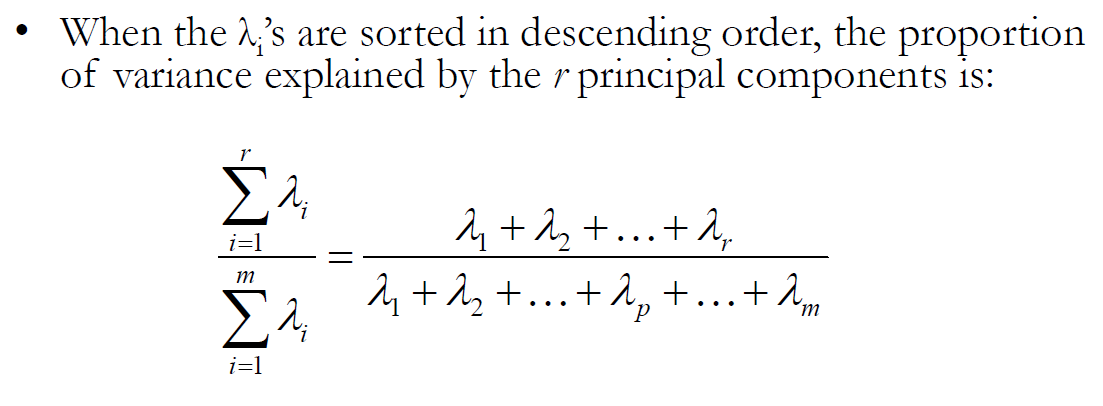

In [ ]:
 import sys
# sys.modules[__name__].__dict__.clear() # clear all variable assignments

In [ ]:
print(Sorted_D)

[6.45269237e+08 3.61788877e+07 1.55372492e+07 1.21129684e+07
 9.91281765e+06 7.96245923e+06 6.86769042e+06 5.41515771e+06
 4.82669661e+06 4.31537980e+06 2.90717822e+06]


In [ ]:
sorted_eigen_values = Sorted_D
feature_index = np.arange(len(Sorted_D))


In [ ]:
r = 11 # set number of eigen values 1 through 11
numerator = np.zeros_like(sorted_eigen_values)
answer = []
num = 0
for i in range(0, r):
  num += sorted_eigen_values[i]
  numerator[i] = num
  proportion_of_variance_explained_by_the_r_PC = (numerator[i]) / sum(sorted_eigen_values)

  answer.append(round(proportion_of_variance_explained_by_the_r_PC * 100, 2))
answer = np.array(answer)

print(f"For r = {r}: {answer[r-1]} % proportion of the variance in the data is Explained.") # i.e., 92.8% of data

For r = 11: 100.0 % proportion of the variance in the data is Explained.


In [ ]:
import plotly.express as px
feature_index = np.arange(r)
fig = px.bar(x=feature_index, y=sorted_eigen_values[0:r], 
             title=f'{answer[r-1]}% Proportion of Variance Explained by {feature_index[r-1]+1} PCs' # i.e., variance in data
             )
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    xaxis=dict(
        title_text="Feature Index",
        ticktext=["$λ_1$", "$λ_2$", "$λ_3$", "$λ_4$", "$λ_5$", "$λ_6$", "$λ_7$", "$λ_8$", "$λ_9$", "$λ_{10}$", "$λ_{11}$"],
        tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    ),
    yaxis=dict(
        title_text="Eigen Values"
    )
)
fig.show()

In [ ]:
import plotly.express as px
feature_index = np.arange(r)
fig = px.line(x=feature_index + 1, y=answer[0:r], 
             title=f'{answer[r-1]}% Proportion of Variance Explained by {feature_index[r-1]+1} PCs' # i.e., variance in data
             )
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    xaxis=dict(
        title_text="Feature Index",
        tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    ),
    yaxis=dict(
        title_text="% Variance ∝ Eigen Values Ratio"
    )
)
fig.show()

# Part 3:
The objective of this part is to test classification using the linear discriminant analysis.
- 1. Generate 300 random samples normally distributed with $N(μ=200,σ^2=8)$. Generate another set of 300 sample but with $N(μ=400,σ^2=30)$. Construct a set of 2D samples by grouping these two data sets together. These 2D samples will represent class #1.
- 2. Repeat Step 1 but with the following normal distributions: $N(μ=100,σ^2=50)$ and $N(μ=-100,σ^2=20)$. These 2D samples will represent class #2.
- 3. Use the linear discriminant analysis to compute the direction that gives the best separation between the two classes point projections. Divide the points of each class into training and testing. Compute the error percentage in classification (Use Bayes classification of the projected values). Visualize your results.
- 4. Repeat Step 3 for different values of data variance. Comment on the results.


## 1. Generate 300 random samples normally distributed with $N(μ=200,σ^2=8)$. Generate another set of 300 sample but with $N(μ=400,σ^2=30)$. Construct a set of 2D samples by grouping these two data sets together. These 2D samples will represent class #1.

In [ ]:
# set the Seed to get non-zero eigen values
np.random.seed(seed= 13)

# **Note: Using a Prime number Seed setting will give a hashing value that 
# will hash to a perfect disorder (i.e., Entropy Modulo a Prime Number).

In [ ]:
Normal_1 = np.random.normal(200, 8, size=(300, 1)).reshape(300, 1) # $N(μ=200,σ^2=8)$ w/ 300 samples
Normal_2 = np.random.normal(400, 30, size=(300, 1)).reshape(300, 1) # $N(μ=400,σ^2=30)$ w/ 300 samples

Normal_1 = np.append(Normal_1, Normal_2, 1)

X1 = Normal_1

m1, n1 = X1.shape # dimensional feature vector, sample vectors
print("Normally Distributed Class 1:")
print(f"m samples: {m1}")
print(f"n features: {n1}")

Normally Distributed Class 1:
m samples: 300
n features: 2


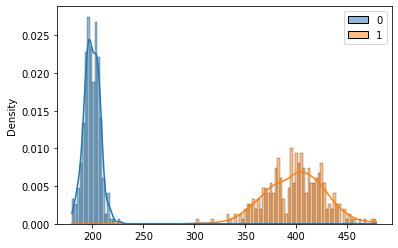

In [ ]:
# plot Density of Class 1
sns.histplot(X1, stat = "density", bins = 120, kde = True)

In [ ]:
print("\n mean sample= \n\n", np.mean(X1, axis = 0))

print("\n sample Variance = \n\n", (np.std(X1, axis=0))**2)


 mean sample= 

 [199.62739946 398.72325334]

 sample Variance = 

 [ 56.8151698  777.74293966]


## 2. Repeat Step 1 but with the following normal distributions: $N(μ=100,σ^2=50)$ and $N(μ=-100,σ^2=20)$. These 2D samples will represent class #2.

In [ ]:
Normal_1 = np.random.normal(100, 50, size=(300, 1)).reshape(300, 1) # $N(μ=200,σ^2=8)$ w/ 300 samples
Normal_2 = np.random.normal(-100, 20, size=(300, 1)).reshape(300, 1) # $N(μ=400,σ^2=30)$ w/ 300 samples

Normal_1 = np.append(Normal_1, Normal_2, 1)

X2 = Normal_1

m2, n2 = X2.shape # dimensional feature vector, sample vectors
print("Normally Distributed Class 2:")
print(f"m samples: {m2}")
print(f"n features: {n2}")

Normally Distributed Class 2:
m samples: 300
n features: 2


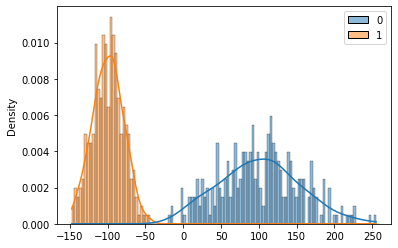

In [ ]:
# plot Density of Class 2
sns.histplot(X2, stat = "density", bins = 120, kde = True)

In [ ]:
print("\n mean sample= \n\n", np.mean(X2, axis = 0))

print("\n sample Variance = \n\n", (np.std(X2, axis=0))**2)


 mean sample= 

 [100.78338173 -99.66195622]

 sample Variance = 

 [2809.38354791  397.43322955]


In [ ]:
print(X1.shape)
print(X2.shape)

(300, 2)
(300, 2)


## 3. Use the linear discriminant analysis to compute the direction that gives the best separation between the two classes point projections. Divide the points of each class into training and testing. Compute the error percentage in classification (Use Bayes classification of the projected values). Visualize your results.

Need the data to be Row Vectors of each normal distributions for the LDA

In [ ]:
X1 = X1.T
X2 = X2.T

print(X1.shape)
print(X2.shape)

(2, 300)
(2, 300)


In [ ]:
from sklearn.model_selection import train_test_split

# split samples into training and testing
X1_train, X1_test = train_test_split(X1.T, train_size = 0.5) # 0.5 is a 50% split
X2_train, X2_test = train_test_split(X2.T, train_size = 0.5) 

X1_train, X1_test = X1_train.T, X1_test.T
X2_train, X2_test = X2_train.T, X2_test.T

In [ ]:
print(f"X1 train shape = {X1_train.shape}")
print(f"X1 test shape = {X1_test.shape}")
print(f"X2 train shape = {X2_train.shape}")
print(f"X2 test shape = {X2_test.shape}")

X1 train shape = (2, 150)
X1 test shape = (2, 150)
X2 train shape = (2, 150)
X2 test shape = (2, 150)


<function matplotlib.pyplot.show>

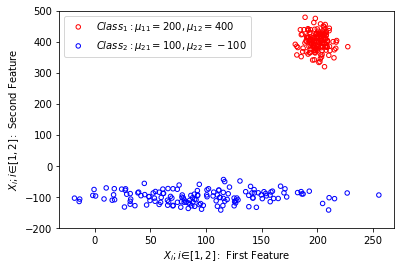

In [ ]:
# plot feature
size = 20
plt.scatter(X1_train[0,:], X1_train[1,:], s=size, facecolors='none', edgecolors='r', label="$Class_1: μ_{11} = 200, μ_{12} = 400$")
plt.scatter(X2_train[0,:], X2_train[1,:], s=size, facecolors='none', edgecolors='b', label = "$Class_2: μ_{21} = 100, μ_{22} = -100$")
plt.xlabel("$X_i;i∈[1,2]:$ First Feature")
plt.ylabel("$X_i;i∈[1,2]:$ Second Feature")
plt.ylim(-200, 500)
plt.legend()
plt.show

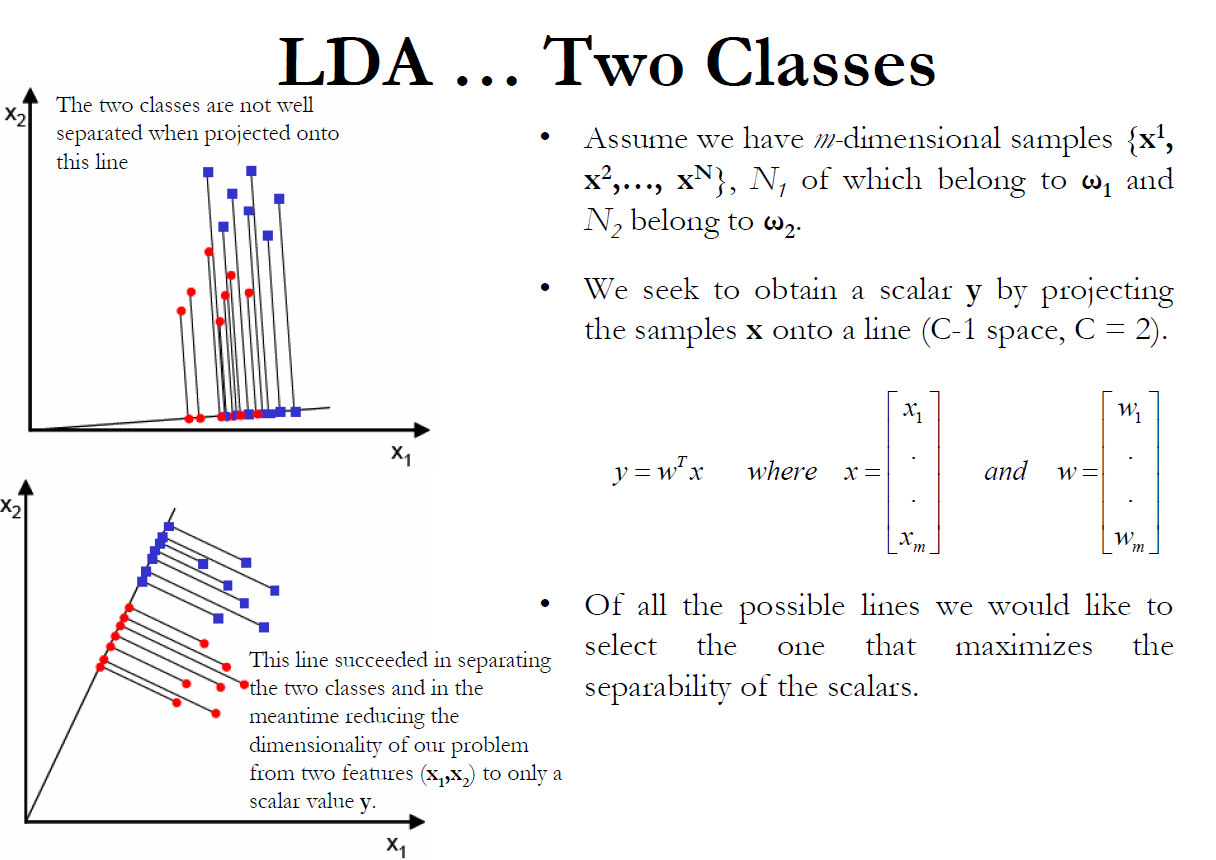

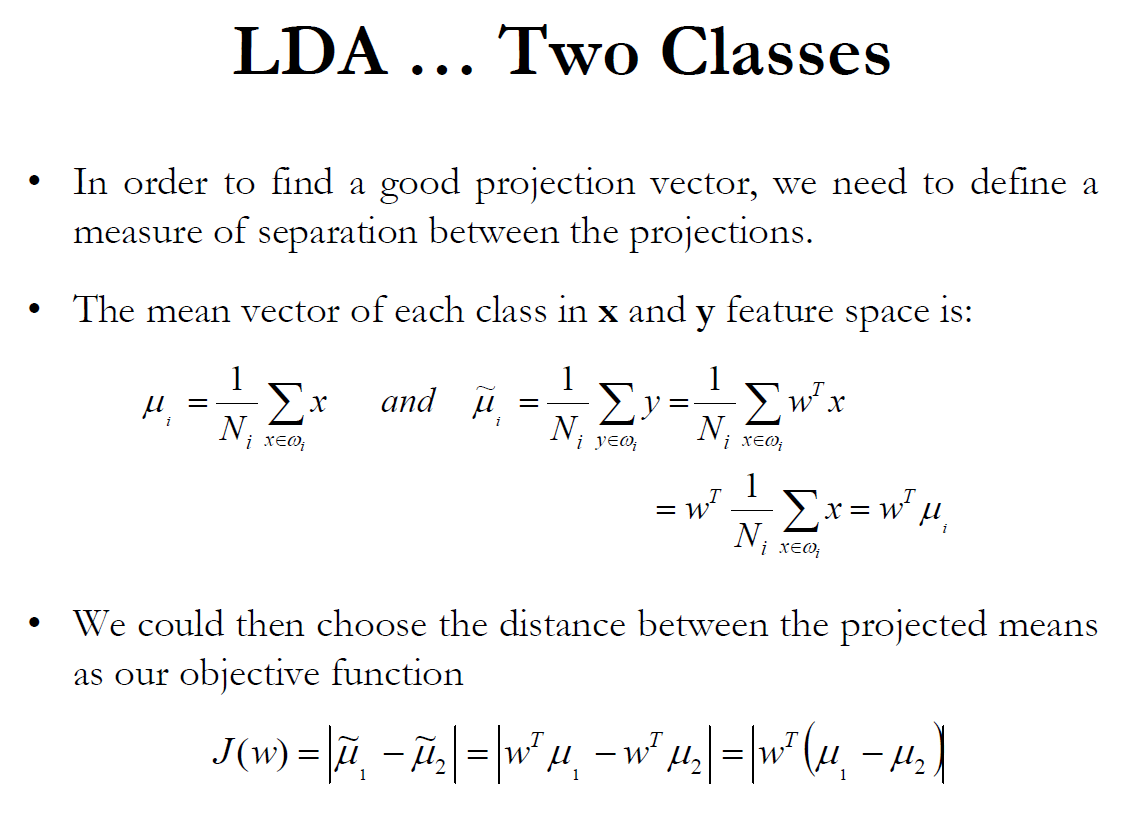

In [ ]:
Mu1 = np.mean(X1_train, axis=1).reshape(2,1)
Mu2 = np.mean(X2_train,axis=1).reshape(2,1)

print(f"Mean Vector of Class 1: \nMu1 = \n{Mu1}\n")
print(f"Mean Vector of Class 2: \nMu2 = \n{Mu2}\n")

Mean Vector of Class 1: 
Mu1 = 
[[199.85654089]
 [400.3545935 ]]

Mean Vector of Class 2: 
Mu2 = 
[[ 96.17495018]
 [-99.44230162]]



In [ ]:
print(Mu1.shape)

(2, 1)


In [ ]:
# covariance of the first class
S1 = (X1_train - Mu1) @ (X1_train - Mu1).T  # or np.cov(X1)

# covariance of the second class
S2 = (X2_train - Mu2) @ (X2_train - Mu2).T # or np.cov(X2)

print(f"Covariance of Class 1: \nS1 = \n{S1}\n")
print(f"Covaraince of Class 2: \nS2 = \n{S2}\n")

Covariance of Class 1: 
S1 = 
[[  9420.34240746   -891.62956177]
 [  -891.62956177 126781.25109331]]

Covaraince of Class 2: 
S2 = 
[[435328.8559955    9230.37649297]
 [  9230.37649297  60866.2529014 ]]



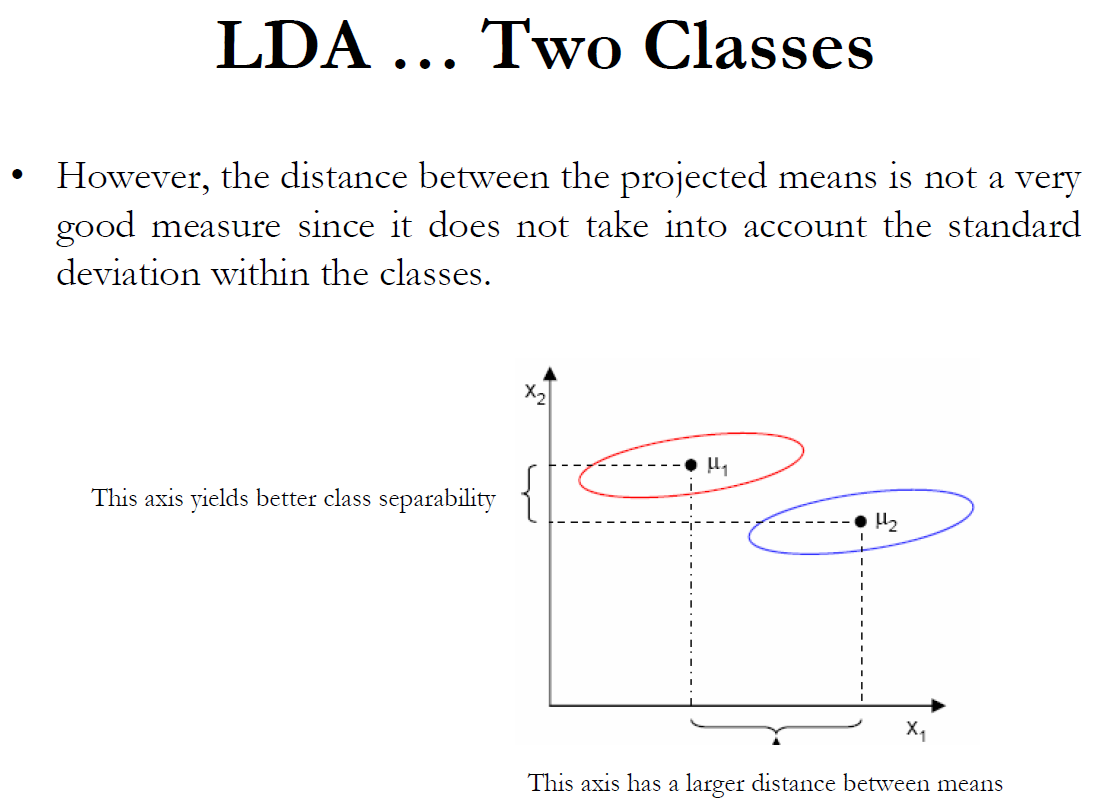

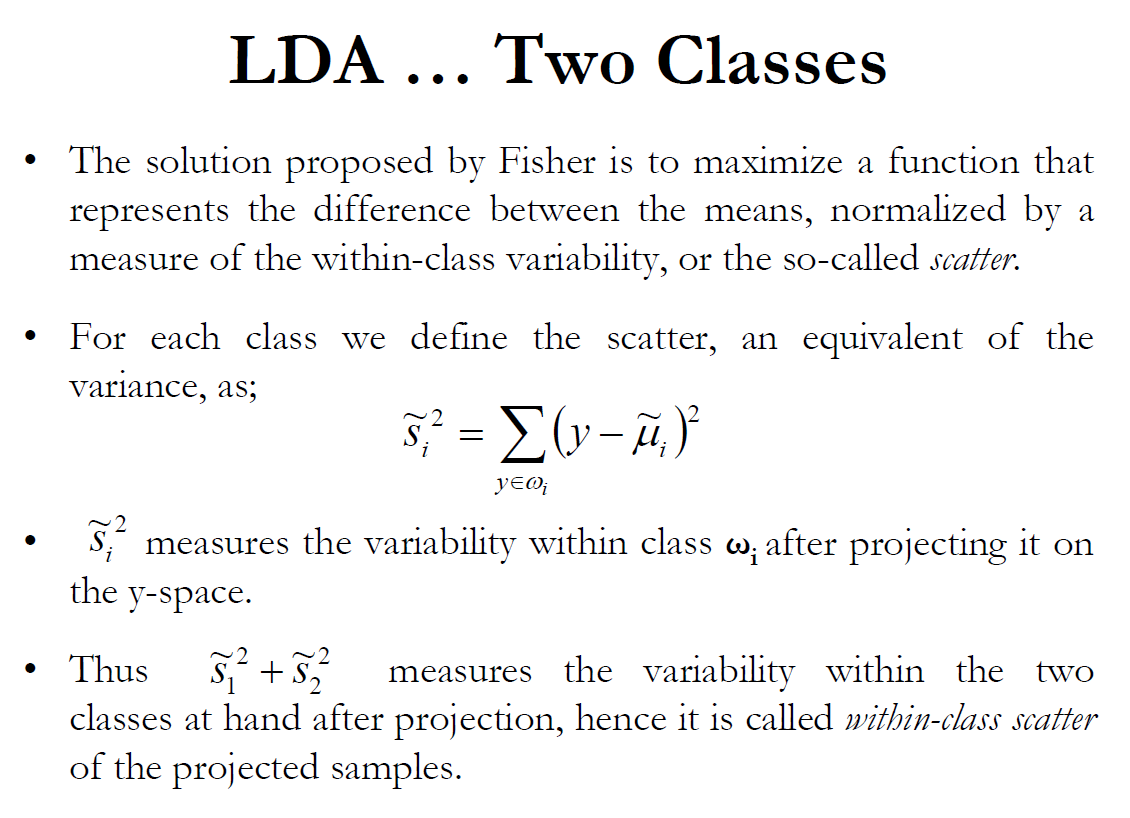

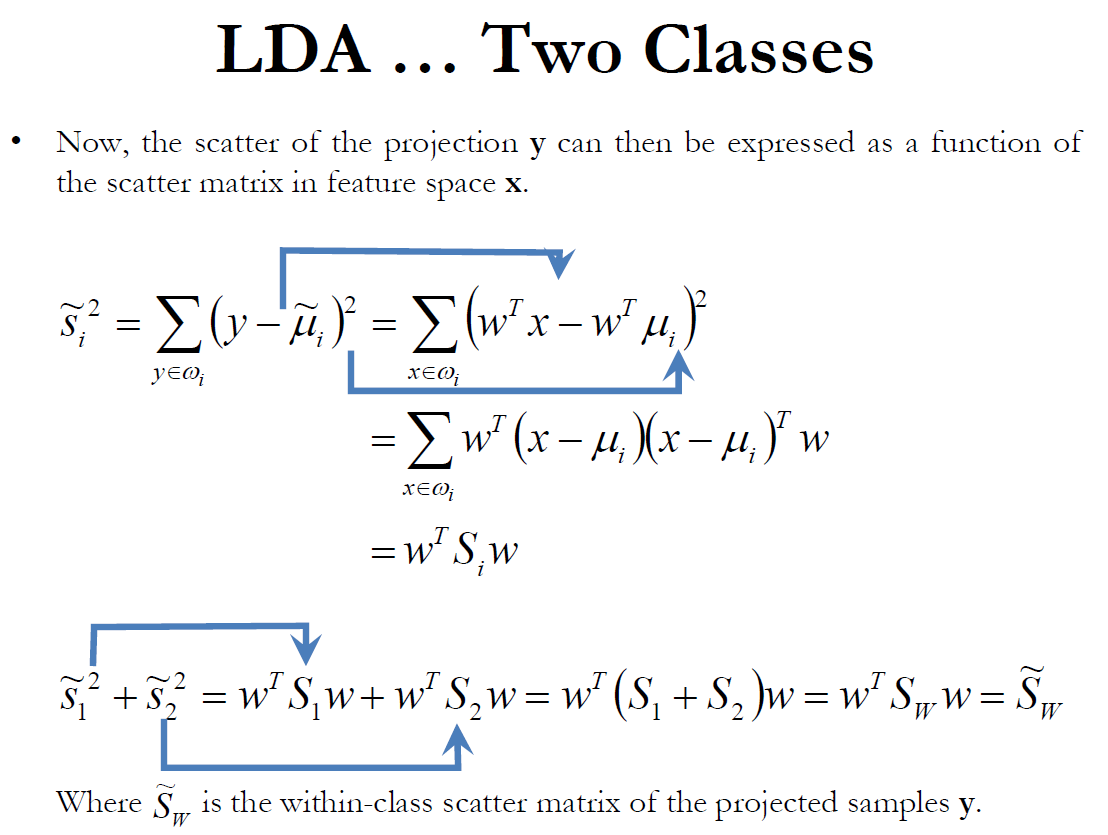

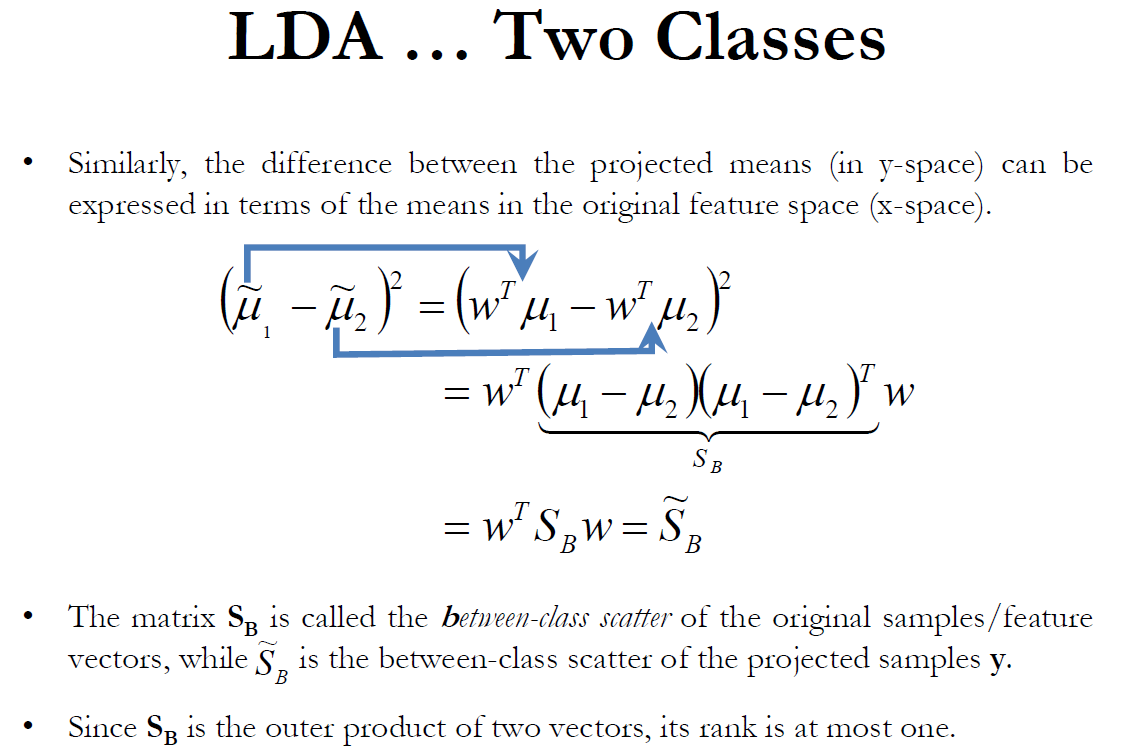

In [ ]:
# Within-Class Fisher Scatter matrix Sw
Sw = S1 + S2

print(f"Within-class Fisher Scatter matrix: \n\nSw = \n{Sw}\n")

Within-class Fisher Scatter matrix: 

Sw = 
[[444749.19840296   8338.74693121]
 [  8338.74693121 187647.50399472]]



In [ ]:
# Between-Class Fisher Scatter matrix Sb
Sb = (Mu1 - Mu2) @ (Mu1 - Mu2).T

print(f"Between-class Fisher Scatter matrix: \n\nSb = \n{Sb}\n")

Between-class Fisher Scatter matrix: 

Sb = 
[[ 10749.87225171  51819.73711717]
 [ 51819.73711717 249796.93637441]]



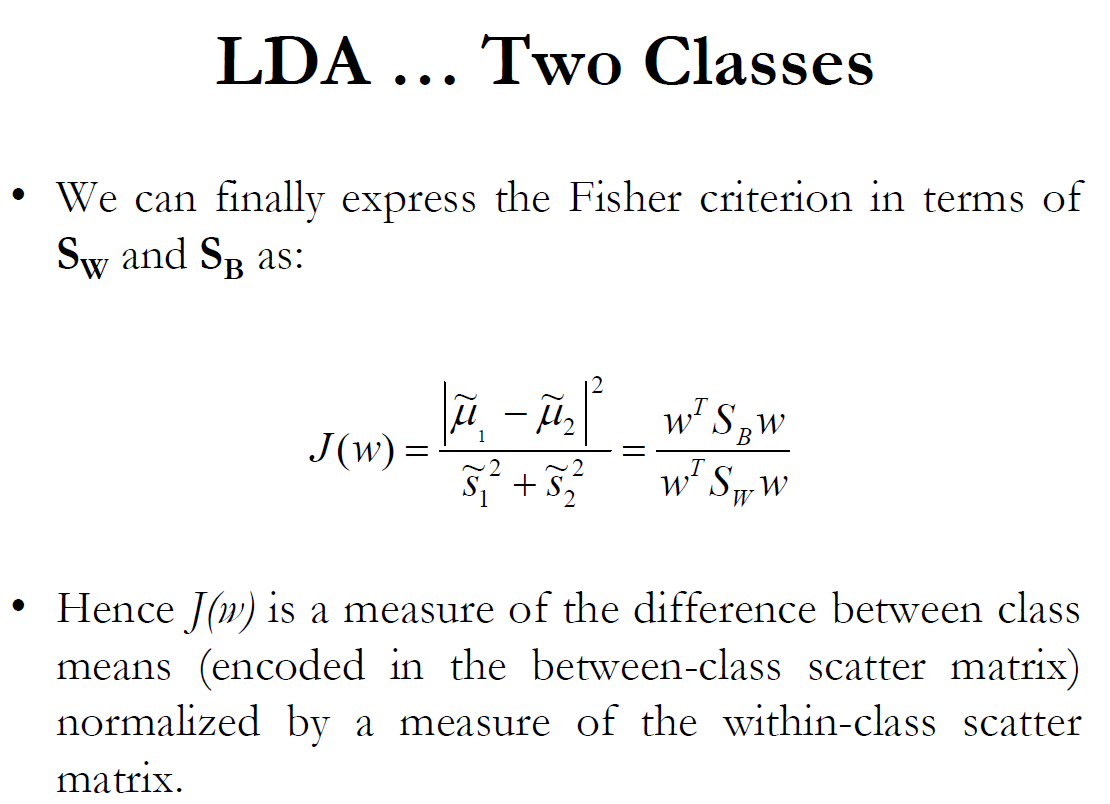

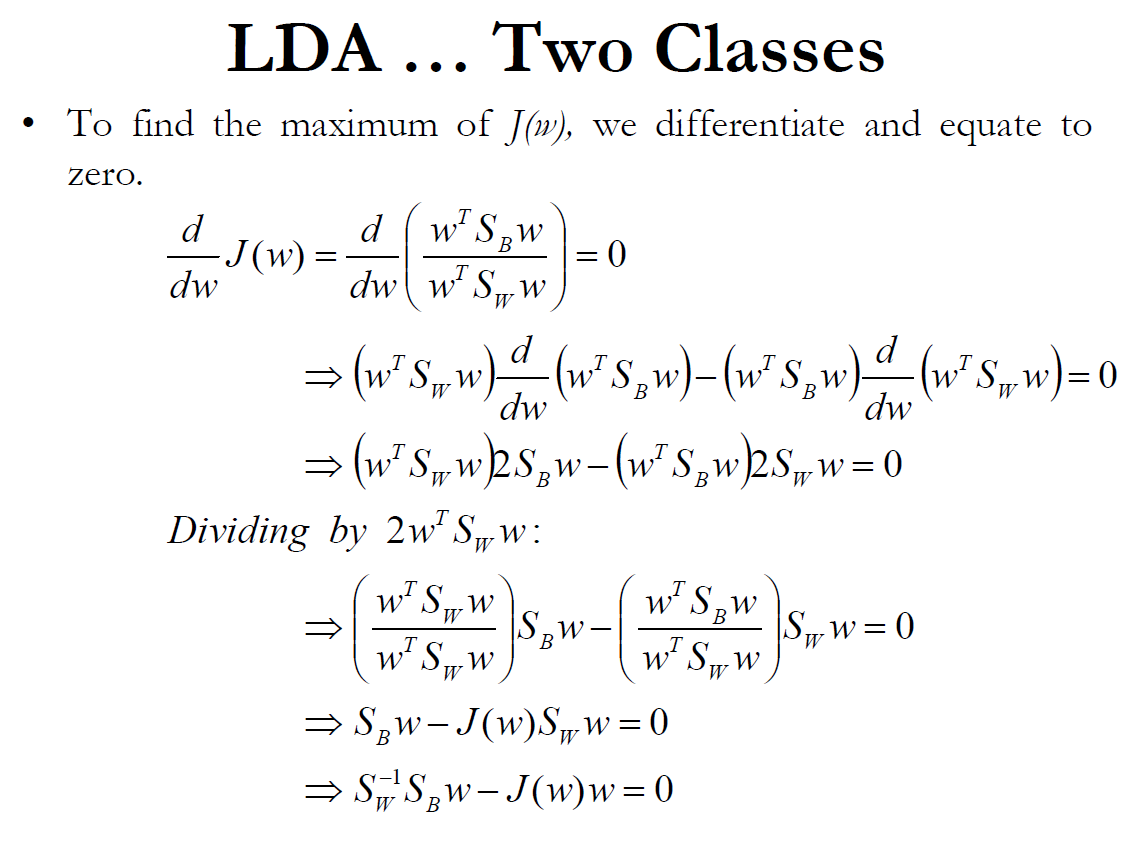

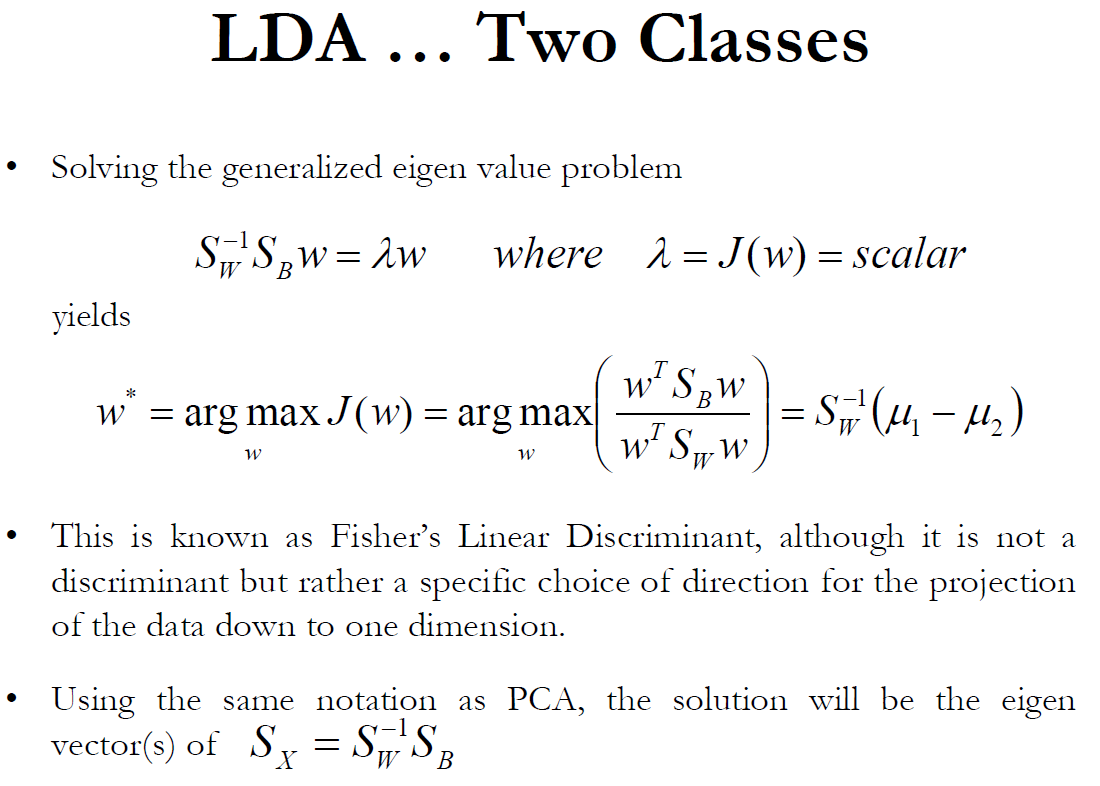

In [ ]:
# Compute the LDA projection
invSw = np.linalg.inv(Sw)

invSw_by_Sb = invSw @ Sb
# or
Sx = invSw @ Sb

# Getting the Eigen Value
[D, V] = np.linalg.eig(Sx) # unpacking eigen_value, eigen_vector

# Deal with the sorting issue just in case:
idx = D.argsort()[::-1]
D = D[idx]
V = V[idx]

# The Projection Vector W
W1 = V[:,0].reshape(2, 1)
W2 = V[:,1].reshape(2, 1)

# ** Note: Need non-zero eigen values for this...
print(f"Projection Vector: \n\nW1 = \n{W1}\n")
print(f"Projection Vector: \n\nW2 = \n{W2}\n")
print(f"Eigen Values: \n\nD = \n{D}\n")

Projection Vector: 

W1 = 
[[ 0.20312285]
 [-0.97915326]]

Projection Vector: 

W2 = 
[[-0.99762489]
 [-0.06888096]]

Eigen Values: 

D = 
[1.34613989 0.        ]



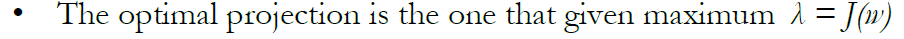

<function matplotlib.pyplot.show>

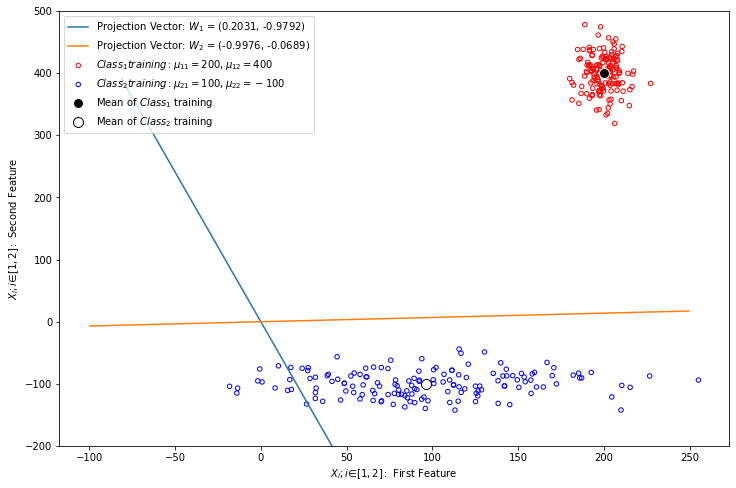

In [ ]:
# first projection Vector
N = 300
t = np.linspace(-400, 250, N, endpoint=True).reshape(1, 300)
line_x1 = W1[0] @ t 
line_y1 = W1[1] @ t

# Second Projection Vector
N = 300
t = np.linspace(100, -250, N, endpoint=True).reshape(1, 300) # negatives to negate the eigen vector signs i.e., 50 to 250
line_x2 = W2[0] @ t 
line_y2 = W2[1] @ t

# Create a Plot
width = 12
height = 8
fig = plt.figure(figsize=(width, height))
fig.set
size = 20 # size of points

# plot the projection vectors
plt.plot(line_x1, line_y1, label = f"Projection Vector: $W_1$ = {round(W1[0][0], 4), round(W1[1][0], 4)}")
plt.plot(line_x2, line_y2, label = f"Projection Vector: $W_2$ = {round(W2[0][0], 4), round(W2[1][0], 4)}")

# plot the Features of the Two Classes
plt.scatter(X1_train[0,:], X1_train[1,:], s=size, facecolors='none', edgecolors='r', label="$Class_1 training: μ_{11} = 200, μ_{12} = 400$")
plt.scatter(X2_train[0,:], X2_train[1,:], s=size, facecolors='none', edgecolors='b', label = "$Class_2 training: μ_{21} = 100, μ_{22} = -100$")

# plot the means
plt.scatter(X1_train[0,:].mean(axis = 0), X1_train[1,:].mean(axis = 0), s=100, facecolors='black', edgecolors='white', label="Mean of $Class_1$ training")
plt.scatter(X2_train[0,:].mean(axis=0), X2_train[1,:].mean(axis = 0), s=100, facecolors='white', edgecolors='black',label = "Mean of $Class_2$ training")


# Plot Attributes
plt.xlabel("$X_i;i∈[1,2]:$ First Feature")
plt.ylabel("$X_i;i∈[1,2]:$ Second Feature")
plt.ylim(-200, 500)
plt.legend(loc="upper left")
plt.show

In [ ]:
import random
X_test = X1_test
X_test = np.append(X_test, X2_test, 1)
random.shuffle(X_test) # mix the class 1 and class 2 data
print(X_test[0, 0])

194.71494001115906


In [ ]:
# Baye's Classification from Linear Discriminant:

# plot the Bayes Misclassification Area for Classes C1 & C2:
# i.e., Choose X -> C1 for P(C1|X) > P(C2|X) else choose X -> C2
# A.k.a., Choose X -> C1 for P(X|C1)p(C1) > P(X|C2)p(C2) else choose X -> C2
Class1_x = []
Class1_y = []
Class2_x = []
Class2_y = []
count1 = 0
count2 = 0
for i in range(0, 300):
    if (X_test[0,i] > line_x2[i] and X_test[1,i] > line_y2[i]):
      count1 += 1
      Class1_x.append(X_test[0,i])
      Class1_y.append(X_test[1,i])
    else:
      count2 += 1
      Class2_x.append(X_test[0,i])
      Class2_y.append(X_test[1,i])

Class1_x = np.array(Class1_x).reshape(150,1)
Class1_y = np.array(Class1_y).reshape(150,1)
Class2_x = np.array(Class2_x).reshape(150,1)
Class2_y = np.array(Class2_y).reshape(150,1)

Class1 = Class1_x
Class1 = np.append(Class1, Class1_y, 1).T
Class2 = Class2_x
Class2 = np.append(Class2, Class2_y, 1).T

   
Class1_Error = 0
Class2_Error = 0
for i in range(0, 150):
  for j in range(0, 1):
    if (Class1[j,i] - X1_test[j,i] != 0):
      Class1_Error += (Class1[j,i] - X1_test[j,i])/sum(X1_test[j,i])
    if (Class2[j,i] - X2_test[j,i] != 0):
      Class2_Error += (Class2[j,i] - X2_test[j,i])/sum(X2_test[j,i]) 

In [ ]:
print(f"Error of Classifying X test as Class 1 = {Class1_Error*100} %")
print(f"Error of Classifying X test as Class 2 = {Class2_Error*100} %")

Error of Classifying X test as Class 1 = 0 %
Error of Classifying X test as Class 2 = 0 %


<function matplotlib.pyplot.show>

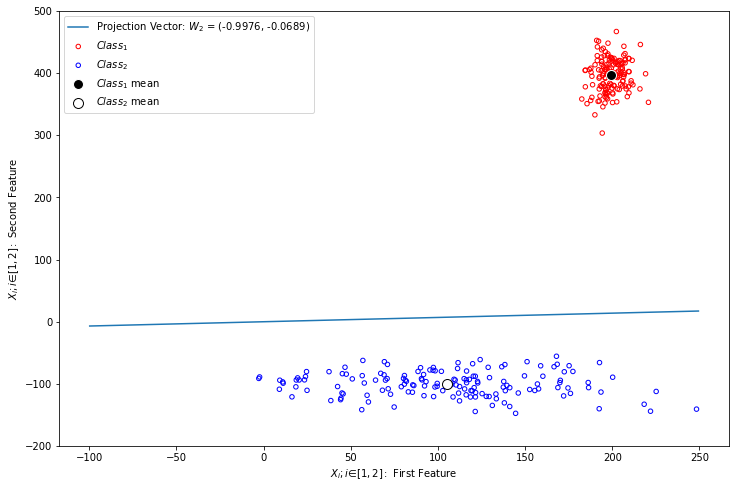

In [ ]:
N = 300
t = np.linspace(-400, 250, N, endpoint=True).reshape(1, 300)
line_x1 = W1[0] @ t 
line_y1 = W1[1] @ t 

# Second Projection Vector 
N = 300
t = np.linspace(100, -250, N, endpoint=True).reshape(1, 300) # negatives to negate the eigen vector signs i.e., 50 to 250
line_x2 = W2[0] @ t 
line_y2 = W2[1] @ t

# Create a Plot
width = 12
height = 8
fig = plt.figure(figsize=(width, height))
fig.set
size = 20 # size of points

# plot the projection vectors
plt.plot(line_x2, line_y2, label = f"Projection Vector: $W_2$ = {round(W2[0][0], 4), round(W2[1][0], 4)}")

# plot the Features of the Two Classes
plt.scatter(Class1[0,:], Class1[1,:], s=size, facecolors='none', edgecolors='r', label="$Class_1$")
plt.scatter(Class2[0,:], Class2[1,:], s=size, facecolors='none', edgecolors='b', label = "$Class_2$")

# plot the means
plt.scatter(Class1[0,:].mean(axis = 0), Class1[1,:].mean(axis = 0), s=100, facecolors='black', edgecolors='white', label="$Class_1$ mean")
plt.scatter(Class2[0,:].mean(axis=0), Class2[1,:].mean(axis = 0), s=100, facecolors='white', edgecolors='black',label = "$Class_2$ mean")

# Plot Attributes
plt.xlabel("$X_i;i∈[1,2]:$ First Feature")
plt.ylabel("$X_i;i∈[1,2]:$ Second Feature")
plt.ylim(-200, 500)
plt.legend()
plt.show

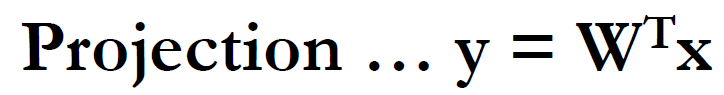

In [ ]:
# class 1 and 2 Projection on Vector W1

# Project X1 onto a new dimension y1 reducing the number of features for X1 from 2 to 1:
y1_w1 = -W1.T @ X1 # dimensions: (1 x 2) * (2 x 300) = (1 x 300)


# Project X2 onto a new dimension y2 reducing the number of features for X2 from 2 to 1:
y2_w1 = -W1.T @ X2 # dimensions: (1 x 2) * (2 x 300) = (1 x 300)

# confirm the dimensionality reduction to (1 x 300):
print(y1_w1.shape)
print(y2_w1.shape)

In [ ]:
# class 1 and 2 Projection on Vector W2

# Project X1 onto a new dimension y1 reducing the number of features for X1 from 2 to 1:
y1_w2 = -W2.T @ X1 # dimensions: (1 x 2) * (2 x 300) = (1 x 300)


# Project X2 onto a new dimension y2 reducing the number of features for X2 from 2 to 1:
y2_w2 = -W2.T @ X2 # dimensions: (1 x 2) * (2 x 300) = (1 x 300)

# confirm the dimensionality reduction to (1 x 300):
print(y1_w2.shape)
print(y2_w2.shape)

In [ ]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

In [ ]:
# Compute probability density functions (pdfs) after projection of w1

# first class mean and standard deviation
y1_w1_Mu = y1_w1.mean(axis=1)
y1_w1_Sigma = y1_w1.std(axis=1)

# second class mean and standard deviation
y2_w1_Mu = y2_w1.mean(axis=1)
y2_w1_Sigma = y2_w1.std(axis=1)

# projection limits
minY = min(y1_w1_Mu, y2_w1_Mu) - 3 * max(y1_w1_Sigma, y2_w1_Sigma) # minimum mean - 3 * max std devation
maxY = max(y1_w1_Mu, y2_w1_Mu) + 3 * max(y1_w1_Sigma, y2_w1_Sigma) # maximum mean + 3 * max std devation
y_w1 = np.arange(minY,maxY, step=0.05)

# pdf calculation after limit calculation
y1_w1_pdf = univariate_normal(y_w1, y1_w1_Mu, y1_w1_Sigma**2)
y2_w1_pdf = univariate_normal(y_w1, y2_w1_Mu, y2_w1_Sigma**2)

# Create a Plot
width = 12
height = 8
fig = plt.figure(figsize=(width, height))
fig.set

# plot the projection pdfs
plt.plot(y_w1,y1_w1_pdf, color='red', label=f"$Class_1: μ = {round(y1_w1_Mu.item())}, σ = {round(y1_w1_Sigma.item())}$")
plt.plot(y_w1,y2_w1_pdf, color='blue', label=f"$Class_2: μ = {round(y2_w1_Mu.item())}, σ = {round(y2_w1_Sigma.item())}$")

# plot attributes
plt.title(f"Projection Using First Eigen Value = {round(D[0], 2)}") # first eigen value always large so we can round
plt.ylabel("$p(y|W_i)$; i∈[1,2]")
plt.xlabel(f"Projection Vector: $W_1$ = {round(W1[0][0], 4), round(W1[1][0], 4)}")
plt.legend()
plt.show()

In [ ]:
# Compute probability density functions (pdfs) after projection of w1

# first class mean and standard deviation
y1_w2_Mu = y1_w2.mean(axis=1)
y1_w2_Sigma = y1_w2.std(axis=1)

# second class mean and standard deviation
y2_w2_Mu = y2_w2.mean(axis=1)
y2_w2_Sigma = y2_w2.std(axis=1)

# projection limits
minY = min(y1_w2_Mu, y2_w2_Mu) - 3 * max(y1_w2_Sigma, y2_w2_Sigma) # minimum mean - 3 * max std devation
maxY = max(y1_w2_Mu, y2_w2_Mu) + 3 * max(y1_w2_Sigma, y2_w2_Sigma) # maximum mean + 3 * max std devation
y_w2 = np.arange(minY,maxY, step=0.05)

# pdf calculation after limit calculation
y1_w2_pdf = univariate_normal(y_w2, y1_w2_Mu, y1_w2_Sigma**2)
y2_w2_pdf = univariate_normal(y_w2, y2_w2_Mu, y2_w2_Sigma**2)

# discover the threshold between the two probabilities:
threshold = []
for j in range(0, len(y1_w2_pdf)):
  if (y1_w2_pdf[j] > y2_w2_pdf[j]):
    threshold.append(y_w2[j])


In [ ]:
# Probability of Error = area under C1
from scipy.integrate import quad
from scipy import stats
mu = y1_w2_Mu
sigma = y1_w2_Sigma
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 300)

def integrand(x):
    return stats.norm.pdf(x, mu, sigma)

# plot the function of integration
I = integrand(x)
plt.plot(x, I, color = "Red", label = f"$Class_1: μ = {round(mu.item())}, σ = {round(sigma.item())}$")
plt.legend()
plt.show()
POE_C1, err = quad(integrand, min(x), threshold[0])

if POE_C1 <= 0:
  POE_C1 = 0

print('\nP(ε|C1) =', POE_C1)

In [ ]:
# Probability of Error = area under C2
from scipy.integrate import quad
from scipy import stats
mu = y2_w2_Mu
sigma = y2_w2_Sigma
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 300)

def integrand(x):
    return stats.norm.pdf(x, mu, sigma)

# plot the function of integration
I = integrand(x)
plt.plot(x, I, color = "Red", label = f"$Class_2: μ = {round(mu.item())}, σ = {round(sigma.item())}$")
plt.legend()
plt.show()
POE_C2, err = quad(integrand, threshold[0], max(x))

if POE_C2 <= 0:
  POE_C2 = 0

print('\nP(ε|C2) =', POE_C2)

In [ ]:
# -----------------------------------------------------------------------------------------------------------------------------

# Create a Plot
width = 20
height = 12
fig = plt.figure(figsize=(width, height))
fig.set

# plot the projection pdfs
plt.plot(y_w2,y1_w2_pdf, color='blue', label=f"$Class_1: μ = {round(y1_w2_Mu.item())}, σ = {round(y1_w2_Sigma.item())}$")
plt.plot(y_w2,y2_w2_pdf, color='red', label=f"$Class_2: μ = {round(y2_w2_Mu.item())}, σ = {round(y2_w2_Sigma.item())}$")

# plot the Bayes Misclassification Area for Classes C1 & C2:
# i.e., Choose X -> C1 for P(C1|X) > P(C2|X) else choose X -> C2
# A.k.a., Choose X -> C1 for P(X|C1)p(C1) > P(X|C2)p(C2) else choose X -> C2
plt.fill_between(y_w2,y2_w2_pdf,
                 where=( y_w2 > threshold[0]), # can also use y1_w2_pdf >= y2_w2_pdf)
                 alpha=0.30, color='Red', interpolate=True, label = f"Class 1 Error: Probability of Choosing C2 given the true class is C1; $P(ε|C1)$ = {round(POE_C1, 5)*100} %")
plt.fill_between(y_w2,y1_w2_pdf,
                 where=( y_w2 <= threshold[0]), # can also use y2_w2_pdf >= y1_w2_pdf)
                 alpha=0.30, color='Blue', interpolate=True, label = f"Class 2 Error: Probability of Choosing C1 given the true class is C2; $P(ε|C2)$ = {round(POE_C2, 5)*100} %")

# plot the threshold:
if (POE_C1 + POE_C2 != 0):
  plt.plot([threshold[0],threshold[0]],[0,0.05], lw = 3 ,color = 'black', label = f"threshold = {round(threshold[0], 2)}")

# plot attributes
plt.title(f"Projection Using Second Eigen Value = {D[1]}") # too small to round
plt.ylabel("$p(y|W_i)$; i∈[1,2]")
plt.xlabel(f"Projection Vector: $W_2$ = {round(W2[0][0], 4), round(W2[1][0], 4)}")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# -----------------------------------------------------------------------------------------------------------------------------

# Create a Plot
width = 10
height = 8
fig = plt.figure(figsize=(width, height))
fig.set

# plot the projection pdfs
plt.plot(y_w2,y1_w2_pdf, color='blue', label=f"$Class_1: μ = {round(y1_w2_Mu.item())}, σ = {round(y1_w2_Sigma.item())}$")
plt.plot(y_w2,y2_w2_pdf, color='red', label=f"$Class_2: μ = {round(y2_w2_Mu.item())}, σ = {round(y2_w2_Sigma.item())}$")

# plot total Area of Error
plt.fill_between(y_w2,y2_w2_pdf,
                 where=( y_w2 > threshold[0]),
                 alpha=0.30, color='Purple', interpolate=True, label = f"Total Error: $P(ε)$ = {round(POE_C1 + POE_C2, 5)*100} %")
plt.fill_between(y_w2,y1_w2_pdf,
                 where=( y_w2 <= threshold[0]),
                 alpha=0.30, color='Purple', interpolate=True)

# plot attributes
plt.title(f"Projection Using Second Eigen Value = {D[1]}") # too small to round
plt.ylabel("$p(y|W_i)$; i∈[1,2]")
plt.xlabel(f"Projection Vector: $W_2$ = {round(W2[0][0], 4), round(W2[1][0], 4)}")
plt.legend(loc="upper left")
plt.show()

## 4. Repeat Step 3 for different values of data variance. Comment on the results.


i.e., just change the parameters at generation start and see the results
